Libraries imported successfully.
Data loaded successfully.
Relevant columns selected.
Dataset shape: (22451, 15)
Subset shape: (100, 15)
Subset categorical variables converted to dummy variables.
Train-test split completed in 0.00 seconds.
Linear Regression model fitted in 0.01 seconds.
Linear Regression coefficients:
                              Coefficient
Customer Number             -1.505771e-08
Dispatch Datetime_1/11/2024  9.603230e-02
Dispatch Datetime_1/12/2024  9.331006e-02
Dispatch Datetime_1/14/2024 -6.597412e-03
Dispatch Datetime_1/15/2024  8.145182e-02
...                                   ...
NATLACCT_WAL010644          -1.873623e-01
NATLACCT_WFA141168          -1.081055e-01
NATLACCT_WSK012270           8.987990e-02
NATLACCT_WSK012430           1.157015e-01
NATLACCT_XPO000NAM           1.435363e-01

[461 rows x 1 columns]
Total time for Linear Regression analysis: 0.02 seconds.
Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_tr

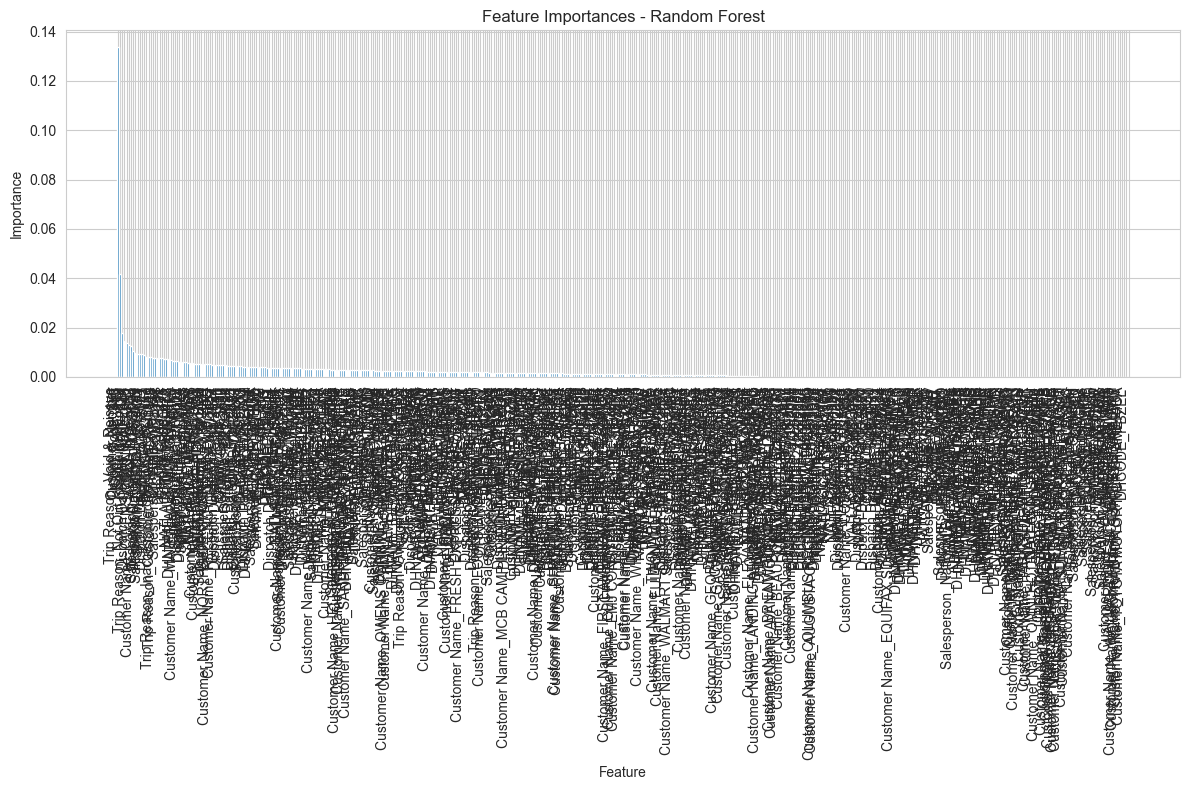

Feature importances displayed.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time

print("Libraries imported successfully.")

# Load the data
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    raise

# Select relevant columns
columns_to_use = [
    'Area', 'Dispatch Datetime', 'Cmpny Code', 'Customer Number', 'High CLV',
    'Customer Name', 'Salesperson', 'DHNAME', 'DHCODE', 'Service Code',
    'Cont. Type', 'Trip Charged', 'Trip Reason', 'National Account Flag', 'NATLACCT'
]
data = data[columns_to_use]
print("Relevant columns selected.")
print(f"Dataset shape: {data.shape}")

# Use a smaller subset for debugging
subset_data = data.sample(n=100, random_state=42)
print(f"Subset shape: {subset_data.shape}")

# Convert categorical variables to dummy variables for the subset
subset_dummies = pd.get_dummies(subset_data, drop_first=True)
print("Subset categorical variables converted to dummy variables.")

# Linear Regression for trip count
start_time = time.time()

y_trip_count = subset_data['Trip Charged'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(subset_dummies.drop(columns=['Trip Charged_Yes']), y_trip_count, test_size=0.3, random_state=42)
print(f"Train-test split completed in {time.time() - start_time:.2f} seconds.")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Linear Regression model fitted in {time.time() - start_time:.2f} seconds.")

coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
print("Linear Regression coefficients:")
print(coefficients)

total_time = time.time() - start_time
print(f"Total time for Linear Regression analysis: {total_time:.2f} seconds.")

# Feature Importance Analysis using Random Forest
X = subset_dummies.drop(columns=['Trip Charged_Yes'])
y = subset_dummies['Trip Charged_Yes']

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)
best_rf = random_search.best_estimator_

# Display feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
print("Feature importances displayed.")


Libraries imported successfully.
Data loaded successfully.
Relevant columns selected.
Dataset shape: (22451, 15)
Subset shape: (100, 15)
Subset categorical variables converted to dummy variables.
Train-test split completed in 0.00 seconds.
Linear Regression model fitted in 0.06 seconds.
Linear Regression coefficients:
                              Coefficient
Customer Number             -1.505771e-08
Dispatch Datetime_1/11/2024  9.603230e-02
Dispatch Datetime_1/12/2024  9.331006e-02
Dispatch Datetime_1/14/2024 -6.597412e-03
Dispatch Datetime_1/15/2024  8.145182e-02
...                                   ...
NATLACCT_WAL010644          -1.873623e-01
NATLACCT_WFA141168          -1.081055e-01
NATLACCT_WSK012270           8.987990e-02
NATLACCT_WSK012430           1.157015e-01
NATLACCT_XPO000NAM           1.435363e-01

[461 rows x 1 columns]
Total time for Linear Regression analysis: 0.06 seconds.
Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_tr

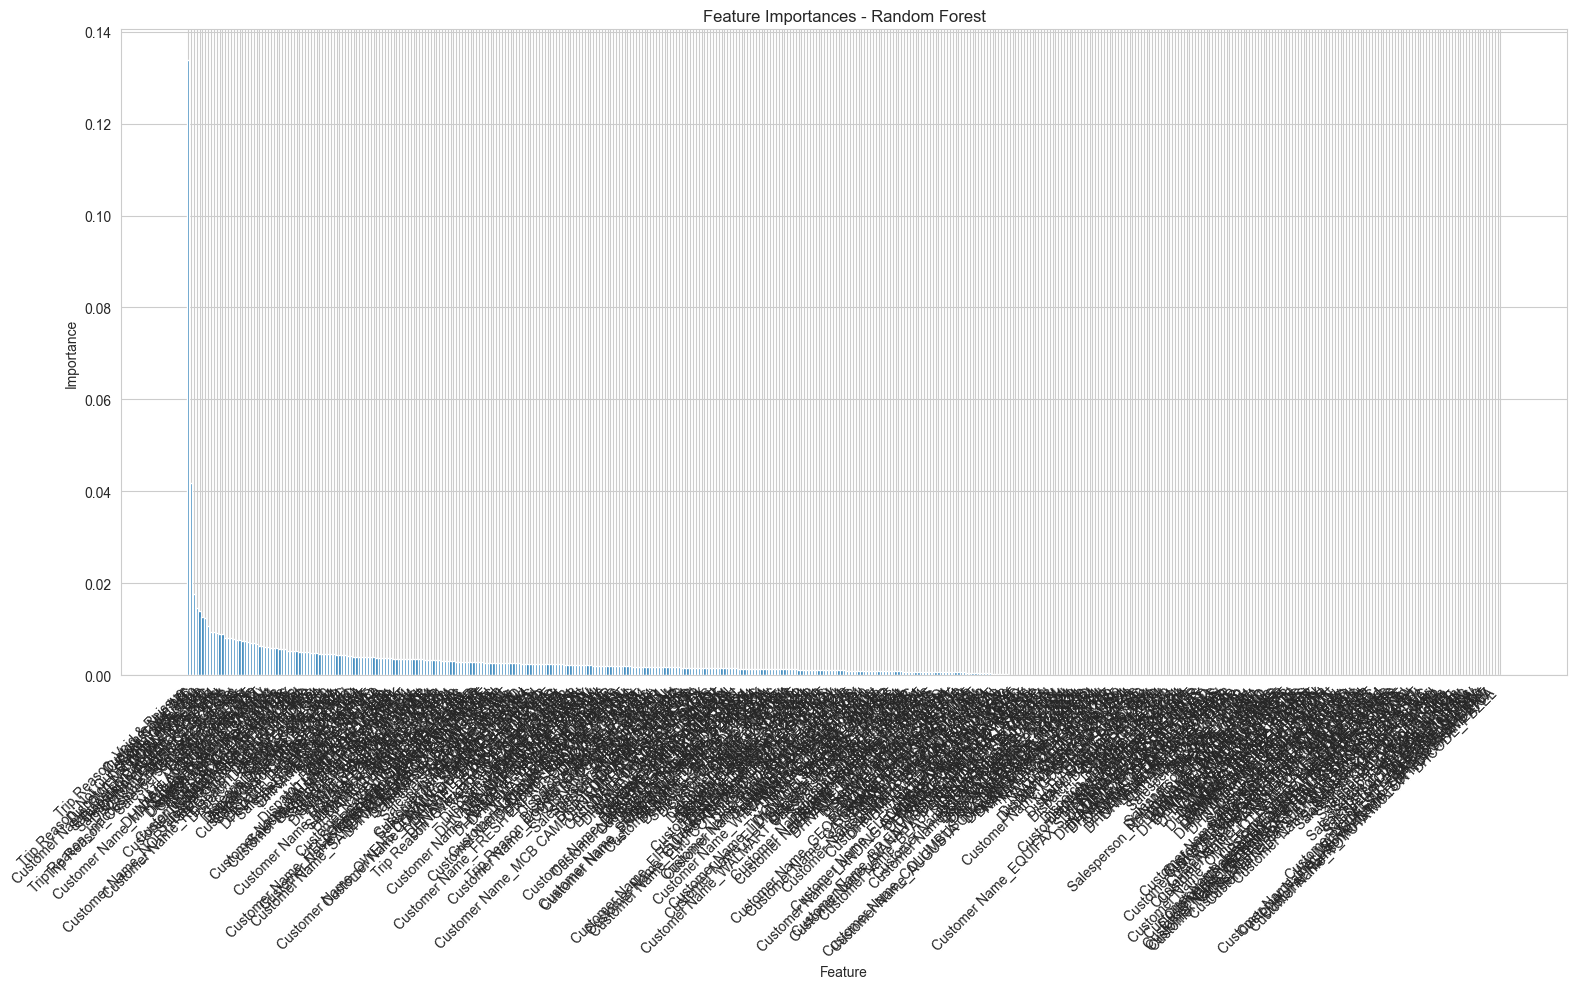

Feature importances displayed.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time

print("Libraries imported successfully.")

# Load the data
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    raise

# Select relevant columns
columns_to_use = [
    'Area', 'Dispatch Datetime', 'Cmpny Code', 'Customer Number', 'High CLV',
    'Customer Name', 'Salesperson', 'DHNAME', 'DHCODE', 'Service Code',
    'Cont. Type', 'Trip Charged', 'Trip Reason', 'National Account Flag', 'NATLACCT'
]
data = data[columns_to_use]
print("Relevant columns selected.")
print(f"Dataset shape: {data.shape}")

# Use a smaller subset for debugging
subset_data = data.sample(n=100, random_state=42)
print(f"Subset shape: {subset_data.shape}")

# Convert categorical variables to dummy variables for the subset
subset_dummies = pd.get_dummies(subset_data, drop_first=True)
print("Subset categorical variables converted to dummy variables.")

# Linear Regression for trip count
start_time = time.time()

y_trip_count = subset_data['Trip Charged'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(subset_dummies.drop(columns=['Trip Charged_Yes']), y_trip_count, test_size=0.3, random_state=42)
print(f"Train-test split completed in {time.time() - start_time:.2f} seconds.")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Linear Regression model fitted in {time.time() - start_time:.2f} seconds.")

coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
print("Linear Regression coefficients:")
print(coefficients)

total_time = time.time() - start_time
print(f"Total time for Linear Regression analysis: {total_time:.2f} seconds.")

# Feature Importance Analysis using Random Forest
X = subset_dummies.drop(columns=['Trip Charged_Yes'])
y = subset_dummies['Trip Charged_Yes']

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)
best_rf = random_search.best_estimator_

# Display feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances
plt.figure(figsize=(16, 10))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45, ha='right', fontsize=10)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
print("Feature importances displayed.")


Libraries imported successfully.
Data loaded successfully.
Relevant columns selected.
Dataset shape: (22451, 15)
Subset shape: (100, 15)
Subset categorical variables converted to dummy variables.
Train-test split completed in 0.01 seconds.
Linear Regression model fitted in 0.18 seconds.
Linear Regression coefficients:
                              Coefficient
Customer Number             -1.505771e-08
Dispatch Datetime_1/11/2024  9.603230e-02
Dispatch Datetime_1/12/2024  9.331006e-02
Dispatch Datetime_1/14/2024 -6.597412e-03
Dispatch Datetime_1/15/2024  8.145182e-02
...                                   ...
NATLACCT_WAL010644          -1.873623e-01
NATLACCT_WFA141168          -1.081055e-01
NATLACCT_WSK012270           8.987990e-02
NATLACCT_WSK012430           1.157015e-01
NATLACCT_XPO000NAM           1.435363e-01

[461 rows x 1 columns]
Total time for Linear Regression analysis: 0.18 seconds.
Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\grays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_tr

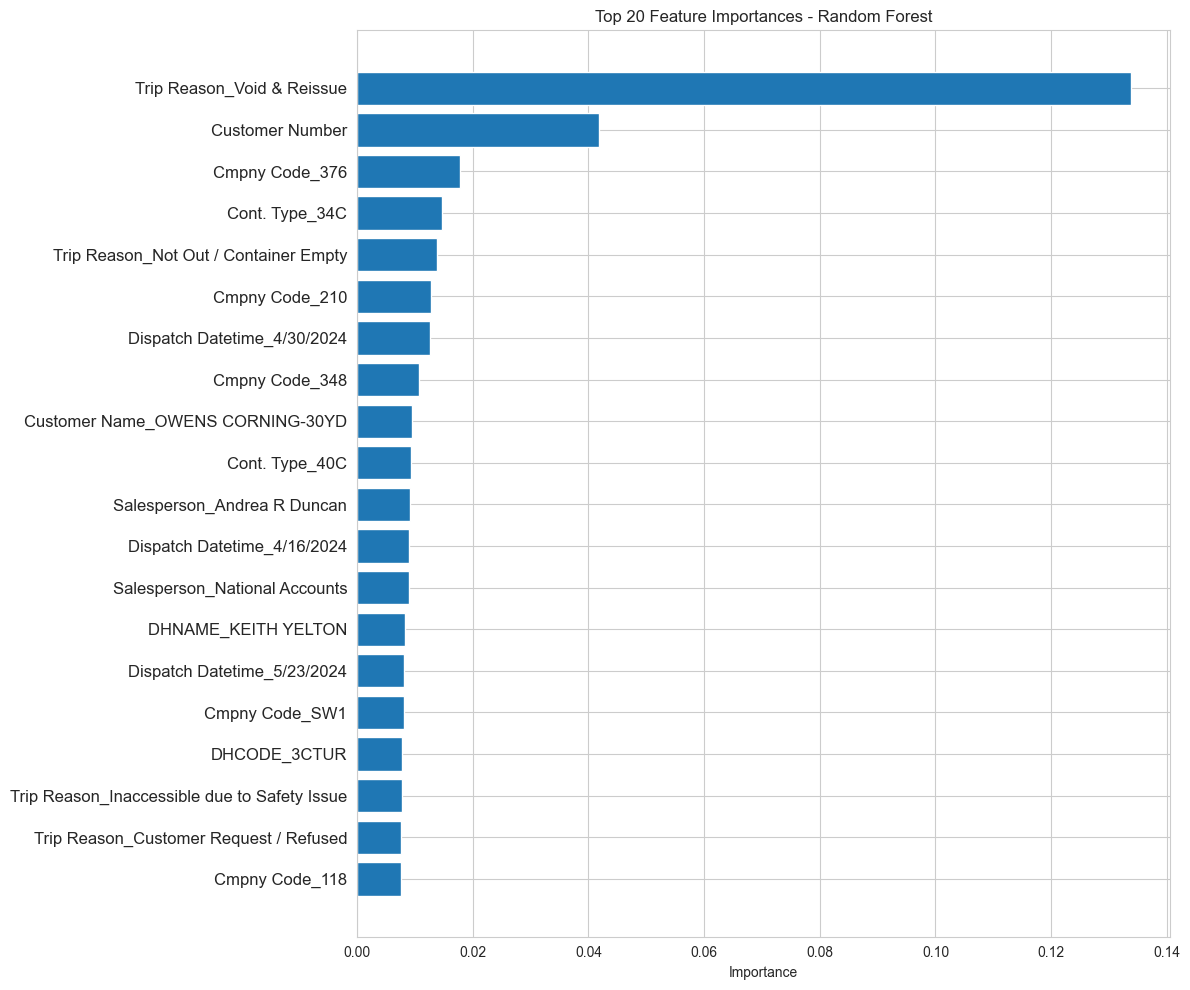

Top 20 feature importances displayed.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time

print("Libraries imported successfully.")

# Load the data
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    raise

# Select relevant columns
columns_to_use = [
    'Area', 'Dispatch Datetime', 'Cmpny Code', 'Customer Number', 'High CLV',
    'Customer Name', 'Salesperson', 'DHNAME', 'DHCODE', 'Service Code',
    'Cont. Type', 'Trip Charged', 'Trip Reason', 'National Account Flag', 'NATLACCT'
]
data = data[columns_to_use]
print("Relevant columns selected.")
print(f"Dataset shape: {data.shape}")

# Use a smaller subset for debugging
subset_data = data.sample(n=100, random_state=42)
print(f"Subset shape: {subset_data.shape}")

# Convert categorical variables to dummy variables for the subset
subset_dummies = pd.get_dummies(subset_data, drop_first=True)
print("Subset categorical variables converted to dummy variables.")

# Linear Regression for trip count
start_time = time.time()

y_trip_count = subset_data['Trip Charged'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(subset_dummies.drop(columns=['Trip Charged_Yes']), y_trip_count, test_size=0.3, random_state=42)
print(f"Train-test split completed in {time.time() - start_time:.2f} seconds.")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Linear Regression model fitted in {time.time() - start_time:.2f} seconds.")

coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
print("Linear Regression coefficients:")
print(coefficients)

total_time = time.time() - start_time
print(f"Total time for Linear Regression analysis: {total_time:.2f} seconds.")

# Feature Importance Analysis using Random Forest
X = subset_dummies.drop(columns=['Trip Charged_Yes'])
y = subset_dummies['Trip Charged_Yes']

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV for faster hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X, y)
best_rf = random_search.best_estimator_

# Display top 20 feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

top_n = 20
top_features = [features[i] for i in indices[:top_n]]
top_importances = importances[indices[:top_n]]

plt.figure(figsize=(12, 10))
plt.title('Top 20 Feature Importances - Random Forest')
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features, fontsize=12)
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("Top 20 feature importances displayed.")


In [6]:
# Linear Regression for trip count
start_time = time.time()

# Ensure we are using the full subset data for linear regression analysis
y_trip_count = subset_data['Trip Charged'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(subset_dummies.drop(columns=['Trip Charged_Yes']), y_trip_count, test_size=0.3, random_state=42)
print(f"Train-test split completed in {time.time() - start_time:.2f} seconds.")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Linear Regression model fitted in {time.time() - start_time:.2f} seconds.")

coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
print("Linear Regression coefficients:")
print(coefficients)

total_time = time.time() - start_time
print(f"Total time for Linear Regression analysis: {total_time:.2f} seconds.")


Train-test split completed in 0.00 seconds.
Linear Regression model fitted in 0.13 seconds.
Linear Regression coefficients:
                              Coefficient
Customer Number             -1.505771e-08
Dispatch Datetime_1/11/2024  9.603230e-02
Dispatch Datetime_1/12/2024  9.331006e-02
Dispatch Datetime_1/14/2024 -6.597412e-03
Dispatch Datetime_1/15/2024  8.145182e-02
...                                   ...
NATLACCT_WAL010644          -1.873623e-01
NATLACCT_WFA141168          -1.081055e-01
NATLACCT_WSK012270           8.987990e-02
NATLACCT_WSK012430           1.157015e-01
NATLACCT_XPO000NAM           1.435363e-01

[461 rows x 1 columns]
Total time for Linear Regression analysis: 0.13 seconds.


In [7]:
# Linear Regression for trip count

# Ensure we are using the full subset data for linear regression analysis
y_trip_count = subset_data['Trip Charged'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(subset_dummies.drop(columns=['Trip Charged_Yes']), y_trip_count, test_size=0.3, random_state=42)
print("Train-test split completed.")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression model fitted.")

coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
print("Linear Regression coefficients:")
print(coefficients)



Train-test split completed.
Linear Regression model fitted.
Linear Regression coefficients:
                              Coefficient
Customer Number             -1.505771e-08
Dispatch Datetime_1/11/2024  9.603230e-02
Dispatch Datetime_1/12/2024  9.331006e-02
Dispatch Datetime_1/14/2024 -6.597412e-03
Dispatch Datetime_1/15/2024  8.145182e-02
...                                   ...
NATLACCT_WAL010644          -1.873623e-01
NATLACCT_WFA141168          -1.081055e-01
NATLACCT_WSK012270           8.987990e-02
NATLACCT_WSK012430           1.157015e-01
NATLACCT_XPO000NAM           1.435363e-01

[461 rows x 1 columns]


In [8]:
# Linear Regression for trip count

# Ensure we are using the full subset data for linear regression analysis
y_trip_count = subset_data['Trip Charged'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(subset_dummies.drop(columns=['Trip Charged_Yes']), y_trip_count, test_size=0.3, random_state=42)
print("Train-test split completed.")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression model fitted.")

coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
print("Linear Regression coefficients:")

# Display the top 20 coefficients
top_coefficients = coefficients.sort_values(by='Coefficient', ascending=False).head(20)
print("Top 20 coefficients:")
print(top_coefficients)

# Display the bottom 20 coefficients
bottom_coefficients = coefficients.sort_values(by='Coefficient', ascending=False).tail(20)
print("Bottom 20 coefficients:")
print(bottom_coefficients)


Train-test split completed.
Linear Regression model fitted.
Linear Regression coefficients:
Top 20 coefficients:
                                              Coefficient
Customer Name_HERITAGE AT RIVERSTONE             0.199093
Salesperson_Graciela Hernandez                   0.199093
Trip Reason_Customer Request / Refused           0.199060
Dispatch Datetime_1/4/2024                       0.164478
Dispatch Datetime_3/12/2024                      0.162531
Customer Name_OWENS CORNING-MATLINE 1-LONG H     0.151920
Cmpny Code_376                                   0.151873
Customer Name_XPO LOGISTICS                      0.143536
NATLACCT_XPO000NAM                               0.143536
Dispatch Datetime_2/26/2024                      0.141850
Cmpny Code_432                                   0.123180
Customer Name_PACTIV                             0.121946
Salesperson_Patrick Mewborn                      0.120370
Customer Name_WALMART SUPERCENTER                0.119514
Customer Name_WIL

In [9]:
# Logistic Regression for trip charge prediction

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression model fitted.")

coefficients_log = pd.DataFrame(log_reg.coef_[0], X_train.columns, columns=['Coefficient'])
print("Logistic Regression coefficients:")
print(coefficients_log)

# Evaluate the logistic regression model
y_pred = log_reg.predict(X_test)
print("Logistic Regression classification report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression model fitted.
Logistic Regression coefficients:
                             Coefficient
Customer Number                 0.000001
Dispatch Datetime_1/11/2024     0.240468
Dispatch Datetime_1/12/2024     0.224521
Dispatch Datetime_1/14/2024     0.000000
Dispatch Datetime_1/15/2024     0.213533
...                                  ...
NATLACCT_WAL010644             -0.401277
NATLACCT_WFA141168             -0.270193
NATLACCT_WSK012270              0.243797
NATLACCT_WSK012430              0.240468
NATLACCT_XPO000NAM              0.274163

[461 rows x 1 columns]
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.67      0.63      0.65        19

    accuracy                           0.57        30
   macro avg       0.54      0.54      0.54        30
weighted avg       0.57      0.57      0.57        30

Logistic Regression confusion matrix:
[[ 5  6]

Correlation matrix calculated.


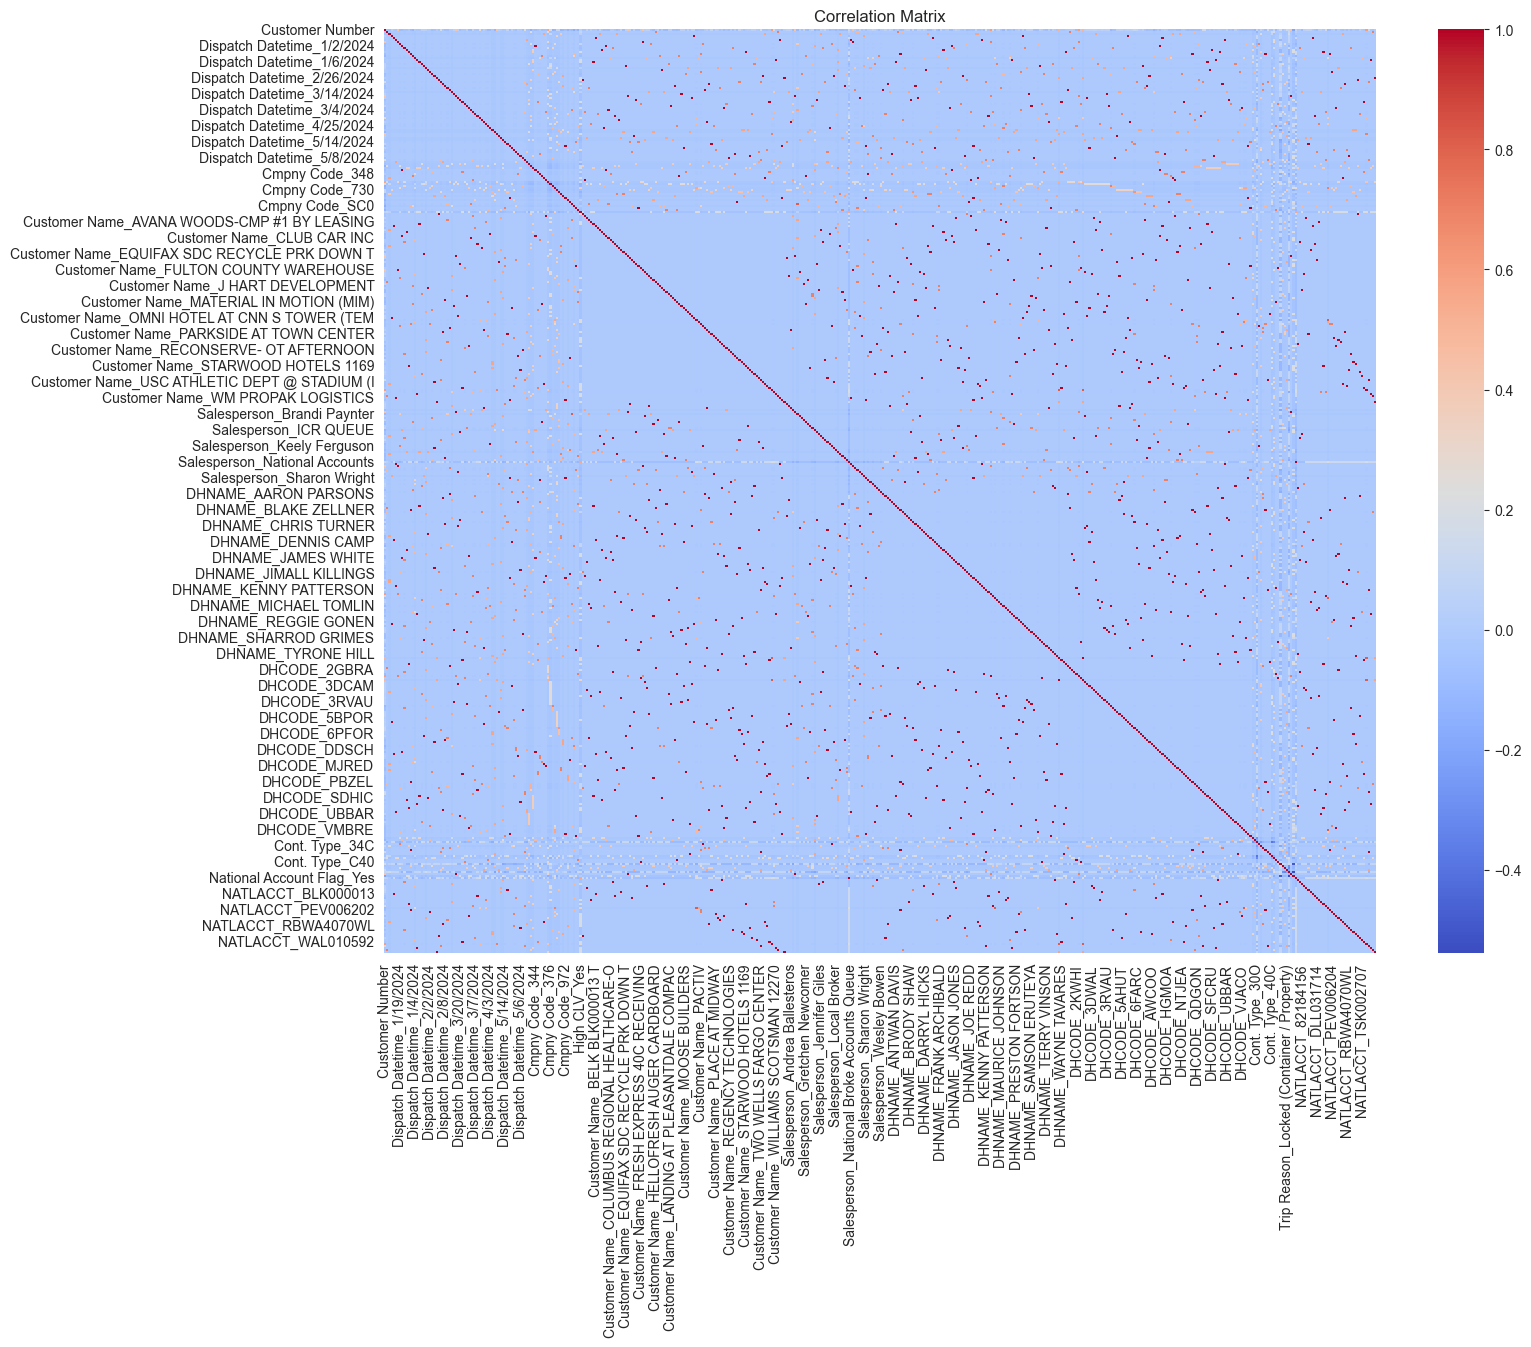

Correlation matrix displayed.
Correlation values for 'Trip Charged_Yes':
Trip Charged_Yes                          1.000000
Cmpny Code_376                            0.185286
Customer Number                           0.164039
Trip Reason_Customer Request / Refused    0.153548
Trip Reason_Not Out / Container Empty     0.153384
                                            ...   
Cont. Type_34C                           -0.183920
Dispatch Datetime_4/30/2024              -0.186751
Dispatch Datetime_5/1/2024               -0.186751
Salesperson_Andrea R Duncan              -0.186751
Trip Reason_Void & Reissue               -0.497529
Name: Trip Charged_Yes, Length: 462, dtype: float64


In [10]:
# Correlation Analysis

# Calculate the correlation matrix using the full subset data
correlation_matrix = subset_dummies.corr()
print("Correlation matrix calculated.")

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print("Correlation matrix displayed.")

# Display the correlation values for 'Trip Charged_Yes'
correlation_target = correlation_matrix['Trip Charged_Yes'].sort_values(ascending=False)
print("Correlation values for 'Trip Charged_Yes':")
print(correlation_target)


                   Area Ticket Entry Datetime Dispatch Datetime  \
0  WM of South Atlantic              8/9/2023          2/8/2024   
1  WM of South Atlantic             10/4/2023         3/29/2024   
2  WM of South Atlantic             10/6/2023          1/4/2024   
3  WM of South Atlantic             10/9/2023          4/1/2024   
4  WM of South Atlantic            10/10/2023          1/8/2024   

  Created By Network ID  Customer Uniq Number  Ticket Cmpny Code  \
0              AABERCRO          291815583007  797927        356   
1               ESBCASE          294400403003  924048        096   
2                RBUDDE          104501522003  927754        730   
3                JREEVE          250601553006  930400        118   
4              CWALKE29          167000173003  939486        731   

   Customer Number High CLV                   Customer Name  ... DHCODE  \
0            41097       No  SOUTH PIEDMONT COMMUNITY COLLE  ...  LGCON   
1           116614       No           

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1983815429.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_customer.values, y=trip_freq_by_customer.index, palette='viridis')


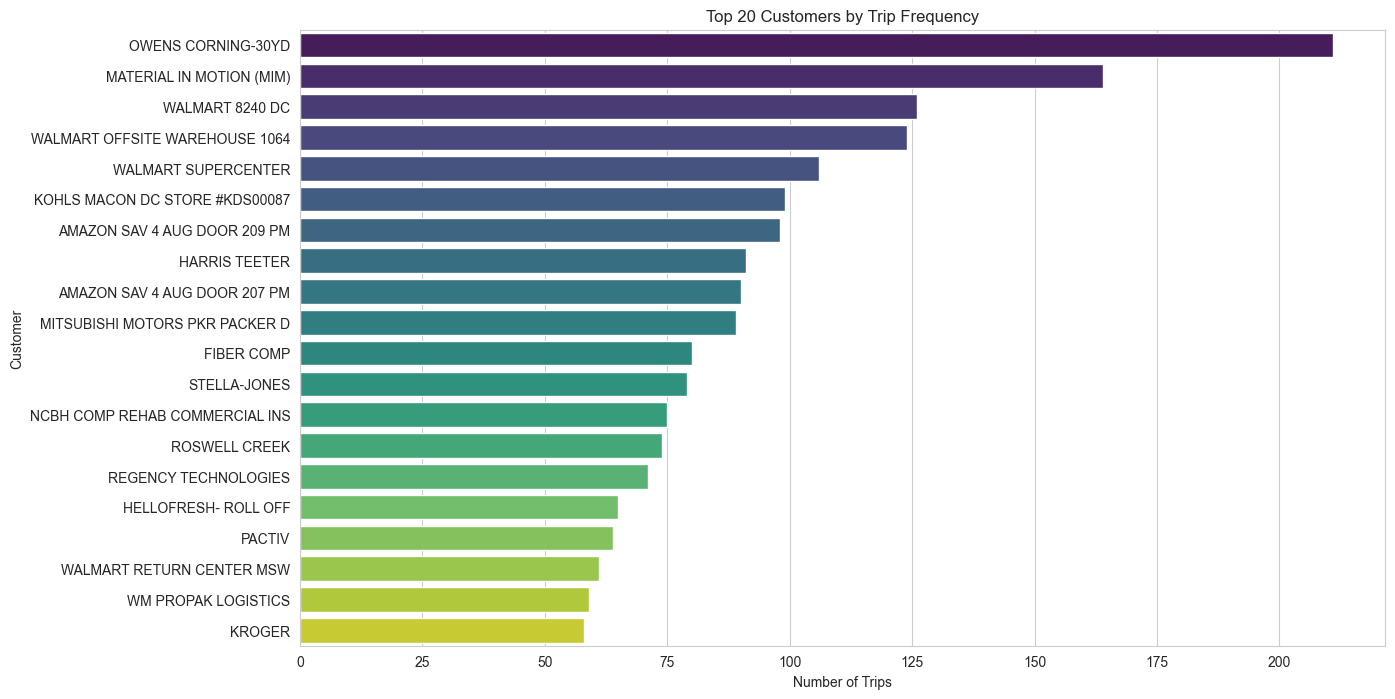

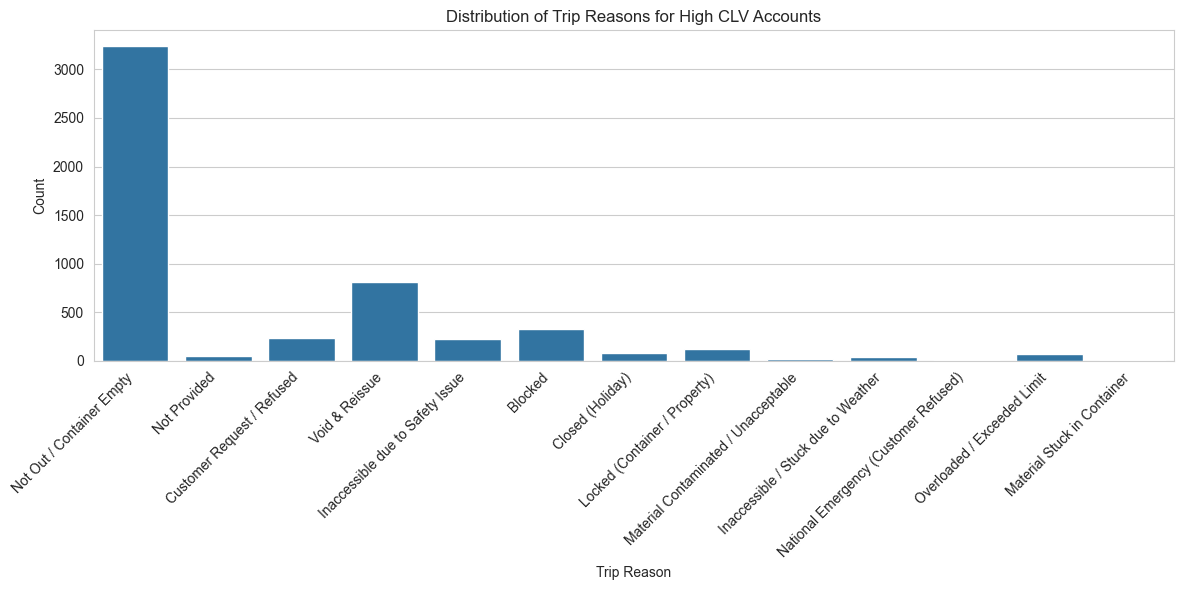

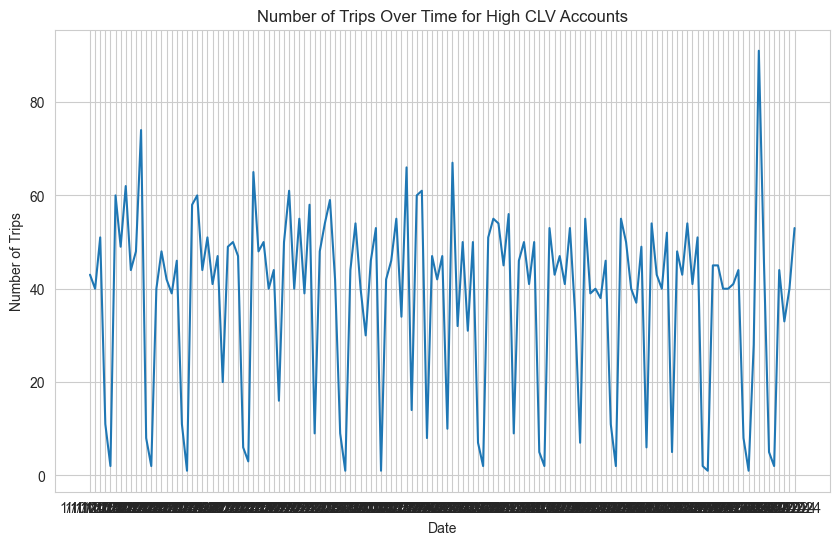

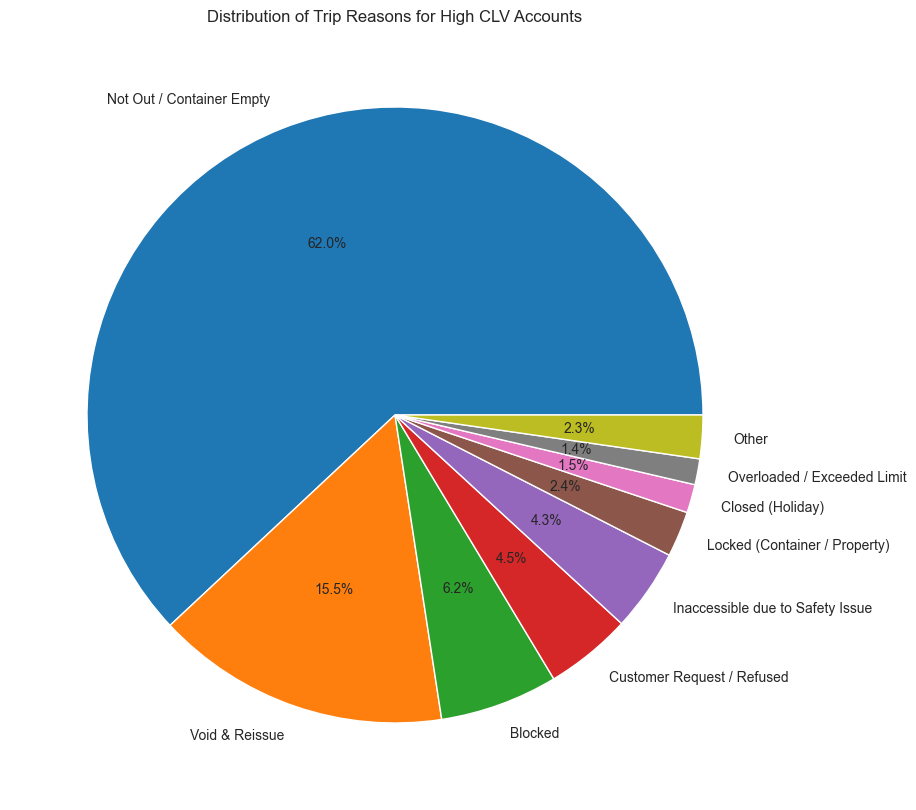

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1983815429.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_driver.values, y=trip_freq_by_driver.index, palette='viridis')


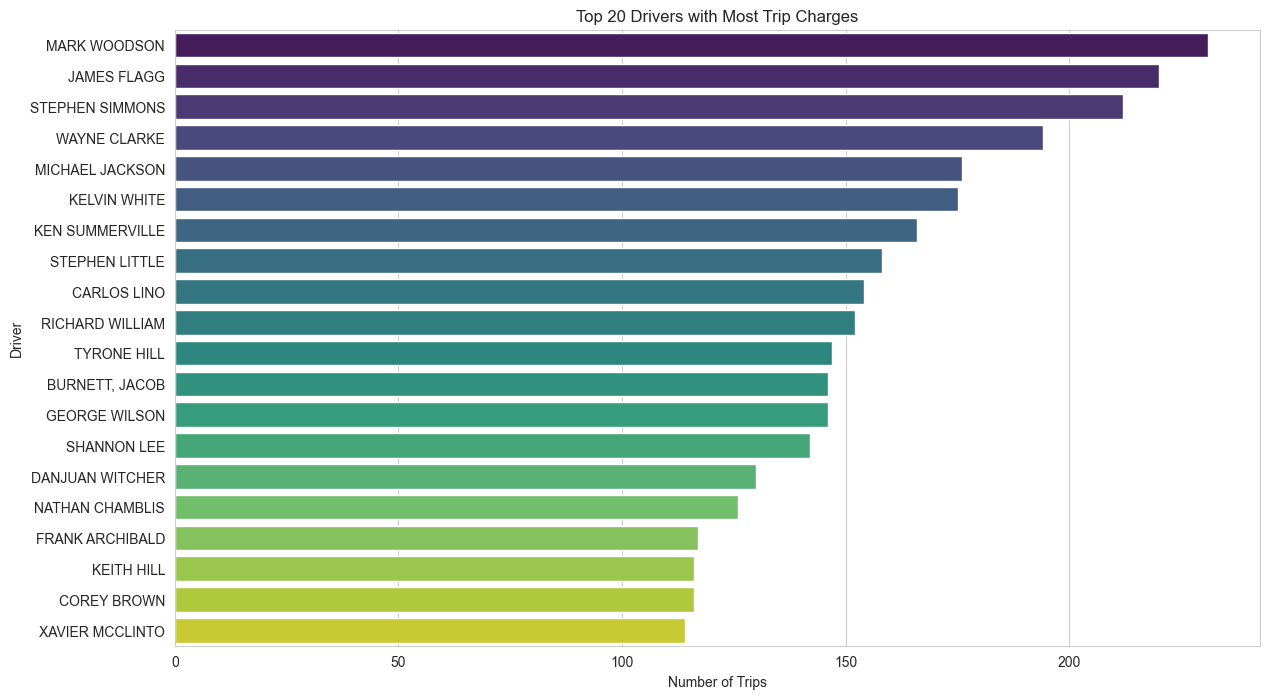

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1983815429.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_salesperson.values, y=trip_freq_by_salesperson.index, palette='viridis')


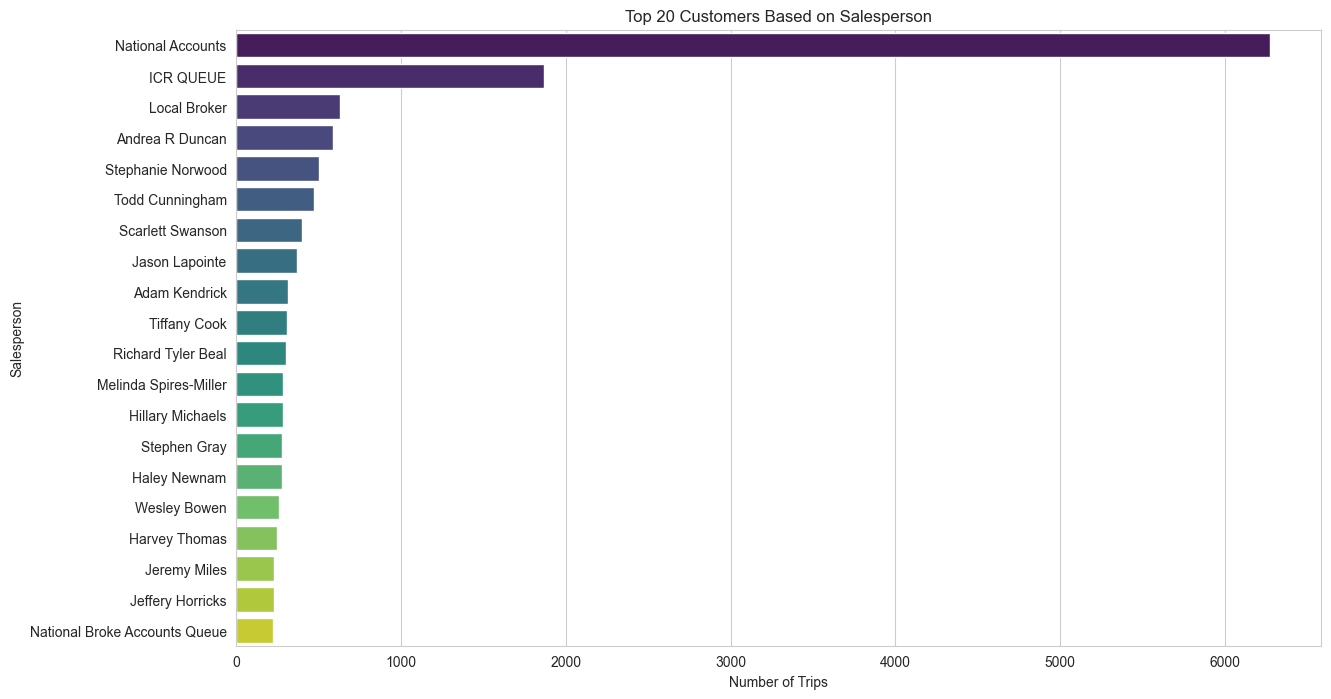

ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

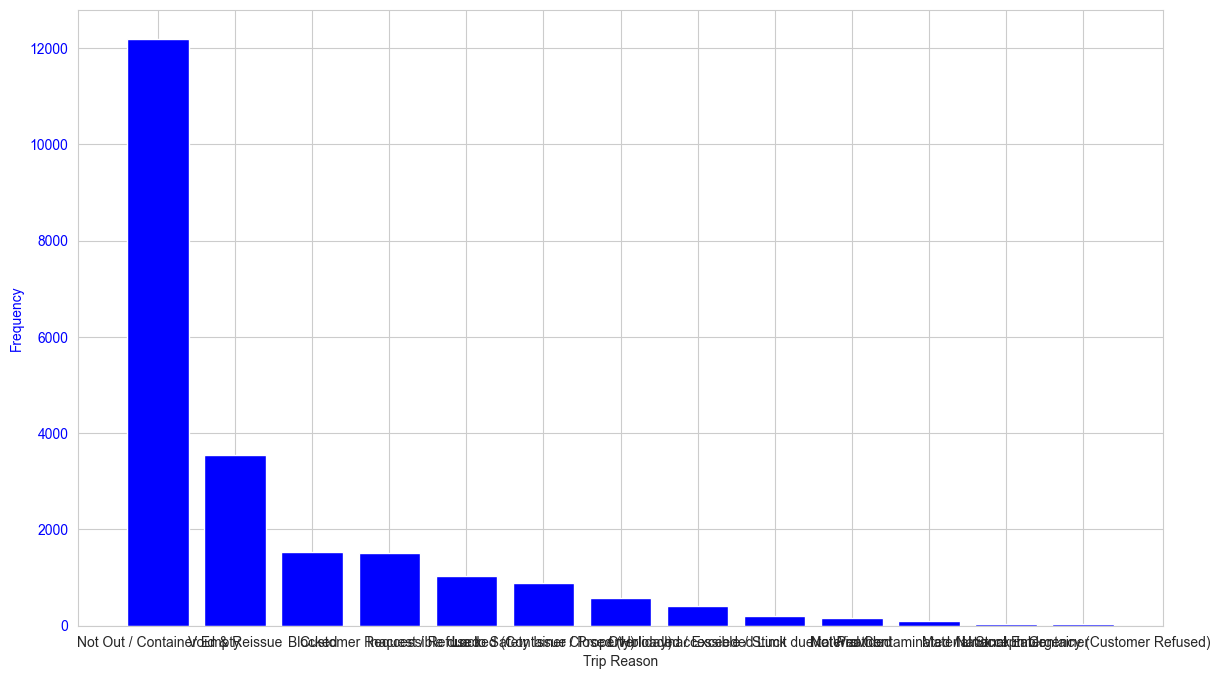

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Drop unnecessary columns
columns_to_drop = ['Ticket Entry Datetime', 'Created By Network ID', 'Customer Uniq Number', 'Load Type', 'On Call / Scheduled', 'SVCGUAR']
data.drop(columns=columns_to_drop, inplace=True)

# Combine 'Cmpny Code' and 'Customer Number' to create a unique customer number with a hyphen
data['Unique Customer Number'] = data['Cmpny Code'].astype(str) + '-' + data['Customer Number'].astype(str)

# Drop the now redundant 'Cmpny Code' and 'Customer Number' columns
data.drop(columns=['Cmpny Code', 'Customer Number'], inplace=True)

# Encode categorical variables
data['High CLV'] = data['High CLV'].map({'Yes': 1, 'No': 0})
data['National Account Flag'] = data['National Account Flag'].map({'Yes': 1, 'No': 0})
data['Trip Charged'] = data['Trip Charged'].map({'Yes': 1, 'No': 0})

# Get dummy variables for categorical features
data_encoded = pd.get_dummies(data, columns=['Service Code', 'Cont. Type', 'Trip Reason', 'DHNAME', 'DHCODE', 'Salesperson'])

# Display the first few rows of the processed dataset
print(data_encoded.head())

# Visualize trip frequency by customer
plt.figure(figsize=(14, 8))
trip_freq_by_customer = data['Customer Name'].value_counts().head(20)  # Top 20 customers by trip frequency
sns.barplot(x=trip_freq_by_customer.values, y=trip_freq_by_customer.index, palette='viridis')
plt.title('Top 20 Customers by Trip Frequency')
plt.xlabel('Number of Trips')
plt.ylabel('Customer')
plt.show()

# Bar Chart for Trip Reasons for High CLV Accounts
plt.figure(figsize=(12, 6))  # Increased figure size for better readability
sns.countplot(x='Trip Reason', data=data[data['High CLV'] == 1])
plt.title('Distribution of Trip Reasons for High CLV Accounts')
plt.xlabel('Trip Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Line Graph for the Number of Trips Over Time for High CLV Accounts
high_clv_trips_over_time = data[data['High CLV'] == 1].groupby('Dispatch Datetime').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=high_clv_trips_over_time.index, y=high_clv_trips_over_time.values)
plt.title('Number of Trips Over Time for High CLV Accounts')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

# Pie Chart for Trip Reasons for High CLV Accounts
high_clv_trip_reason_counts = data[data['High CLV'] == 1]['Trip Reason'].value_counts()
threshold = 0.01 * high_clv_trip_reason_counts.sum()  # Set threshold for grouping less significant categories
significant_reasons = high_clv_trip_reason_counts[high_clv_trip_reason_counts > threshold]
other_reasons = high_clv_trip_reason_counts[high_clv_trip_reason_counts <= threshold]

# Group less significant reasons into 'Other'
significant_reasons['Other'] = other_reasons.sum()

plt.figure(figsize=(10, 10))  # Increased figure size for better readability
plt.pie(significant_reasons, labels=significant_reasons.index, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Distribution of Trip Reasons for High CLV Accounts')
plt.show()

# Top 20 Drivers with Most Trip Charges
plt.figure(figsize=(14, 8))
trip_freq_by_driver = data['DHNAME'].value_counts().head(20)  # Top 20 drivers by trip charges
sns.barplot(x=trip_freq_by_driver.values, y=trip_freq_by_driver.index, palette='viridis')
plt.title('Top 20 Drivers with Most Trip Charges')
plt.xlabel('Number of Trips')
plt.ylabel('Driver')
plt.show()

# Top 20 Customers Based on Salesperson
plt.figure(figsize=(14, 8))
trip_freq_by_salesperson = data['Salesperson'].value_counts().head(20)  # Top 20 customers based on salesperson
sns.barplot(x=trip_freq_by_salesperson.values, y=trip_freq_by_salesperson.index, palette='viridis')
plt.title('Top 20 Customers Based on Salesperson')
plt.xlabel('Number of Trips')
plt.ylabel('Salesperson')
plt.show()

# Pareto Chart for Trip Reasons
trip_reason_counts = data['Trip Reason'].value_counts()
trip_reason_cumsum = trip_reason_counts.cumsum() / trip_reason_counts.sum()

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(trip_reason_counts.index, trip_reason_counts.values, color='b')
ax1.set_xlabel('Trip Reason')
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params('y', colors='b')
ax1.tick_params('x', rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(trip_reason_counts.index, trip_reason_cumsum, color='r', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Chart for Trip Reasons')
plt.tight_layout()
plt.show()

# Histogram for Trip Duration (assuming 'Trip Duration' is a column)
plt.figure(figsize=(14, 8))
sns.histplot(data['Trip Duration'], kde=True, bins=30, color='purple')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()

# Histogram for Trip Charges
plt.figure(figsize=(14, 8))
sns.histplot(data['Trip Charged'], kde=True, bins=30, color='green')
plt.title('Distribution of Trip Charges')
plt.xlabel('Trip Charged')
plt.ylabel('Frequency')
plt.show()


                   Area Ticket Entry Datetime Dispatch Datetime  \
0  WM of South Atlantic              8/9/2023          2/8/2024   
1  WM of South Atlantic             10/4/2023         3/29/2024   
2  WM of South Atlantic             10/6/2023          1/4/2024   
3  WM of South Atlantic             10/9/2023          4/1/2024   
4  WM of South Atlantic            10/10/2023          1/8/2024   

  Created By Network ID  Customer Uniq Number  Ticket Cmpny Code  \
0              AABERCRO          291815583007  797927        356   
1               ESBCASE          294400403003  924048        096   
2                RBUDDE          104501522003  927754        730   
3                JREEVE          250601553006  930400        118   
4              CWALKE29          167000173003  939486        731   

   Customer Number High CLV                   Customer Name  ... DHCODE  \
0            41097       No  SOUTH PIEDMONT COMMUNITY COLLE  ...  LGCON   
1           116614       No           

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1983815429.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_customer.values, y=trip_freq_by_customer.index, palette='viridis')


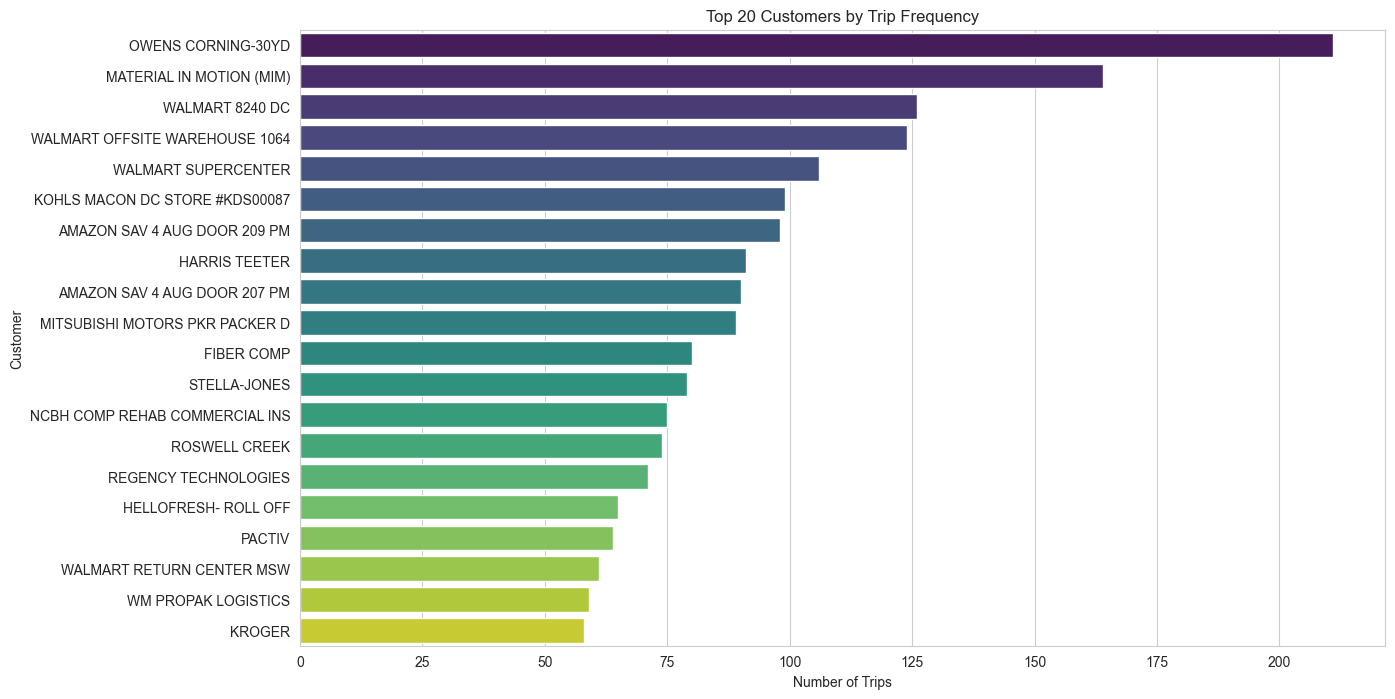

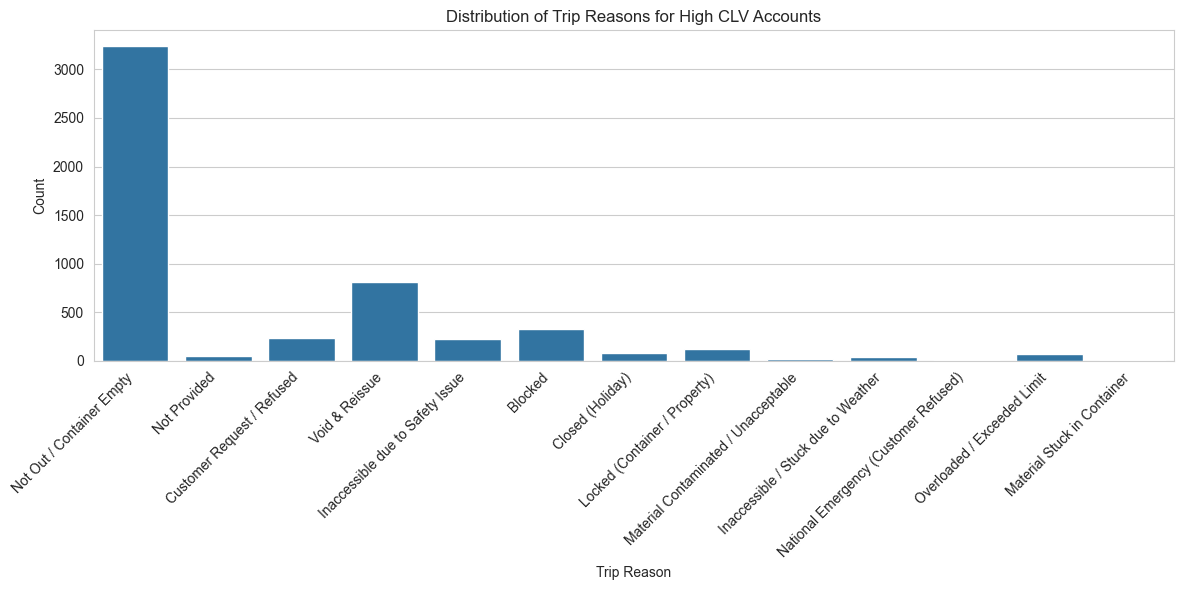

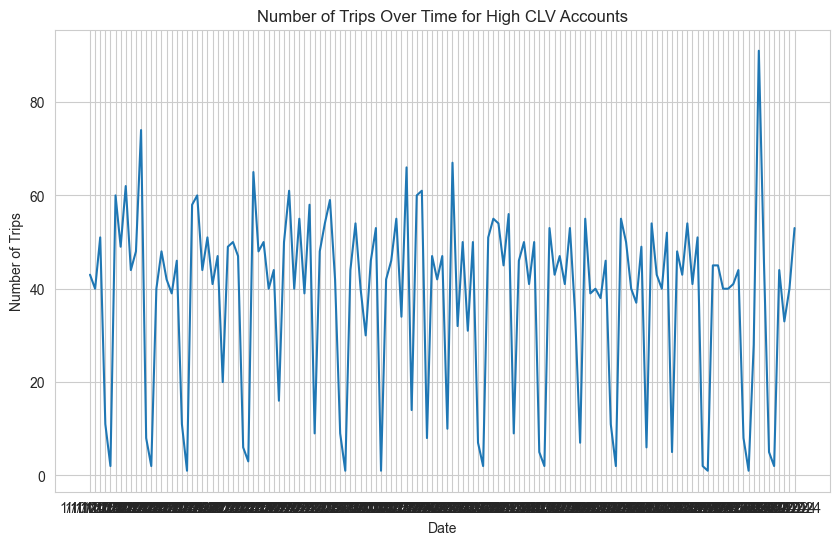

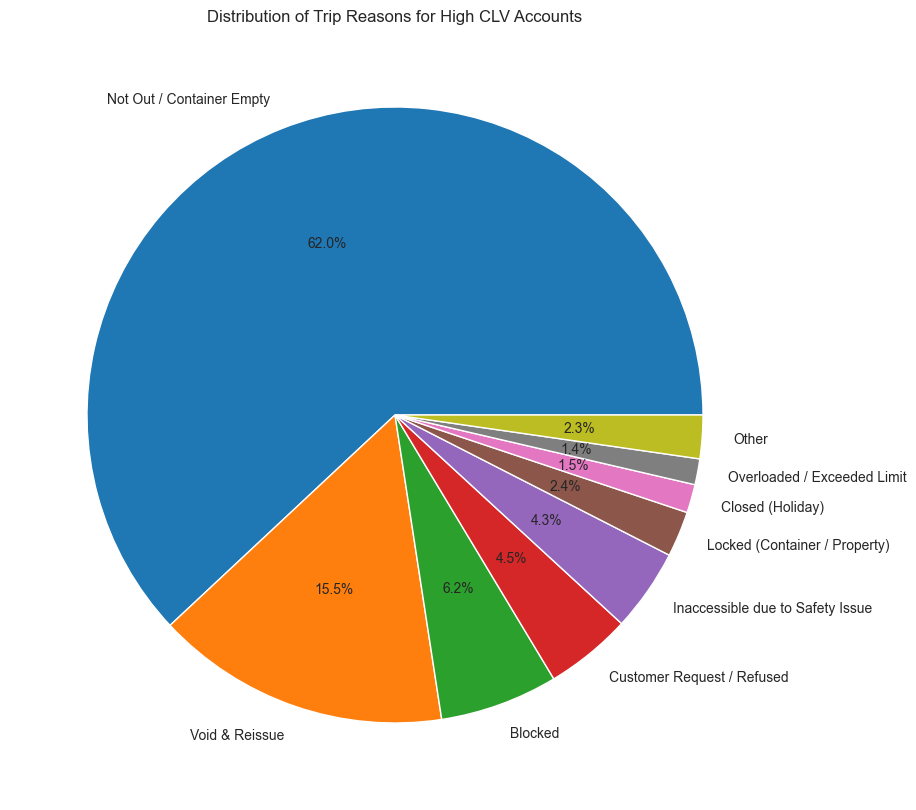

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1983815429.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_driver.values, y=trip_freq_by_driver.index, palette='viridis')


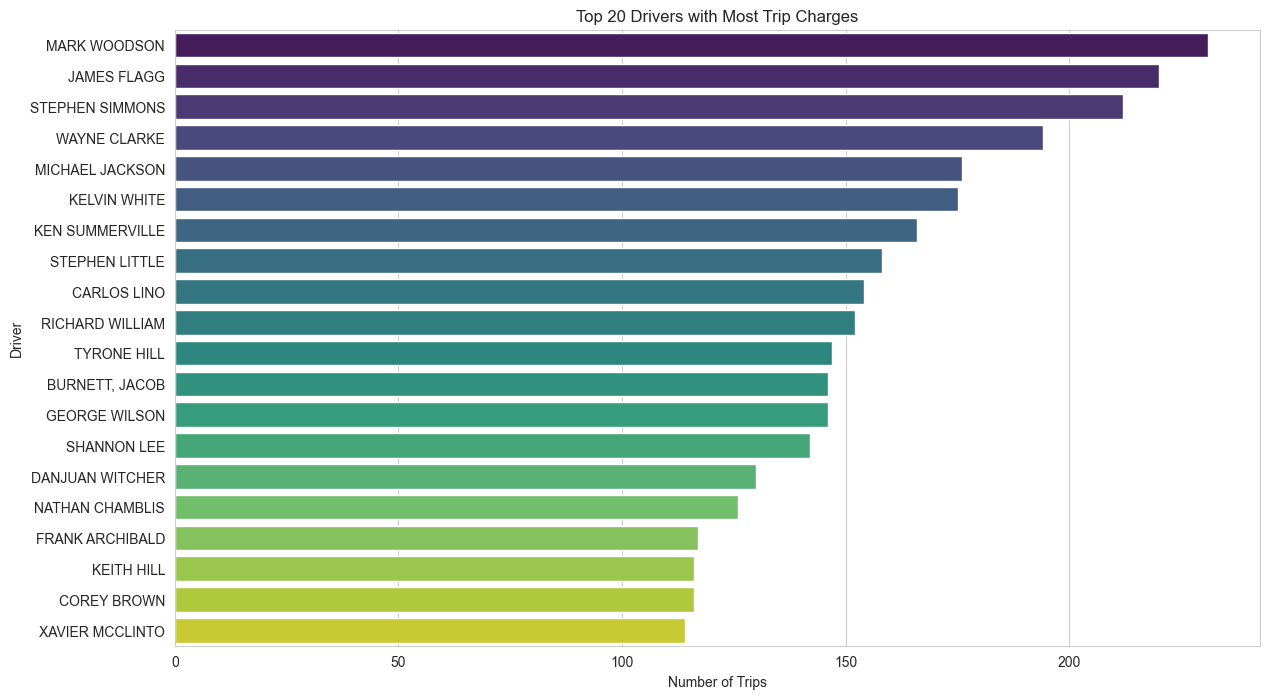

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1983815429.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_salesperson.values, y=trip_freq_by_salesperson.index, palette='viridis')


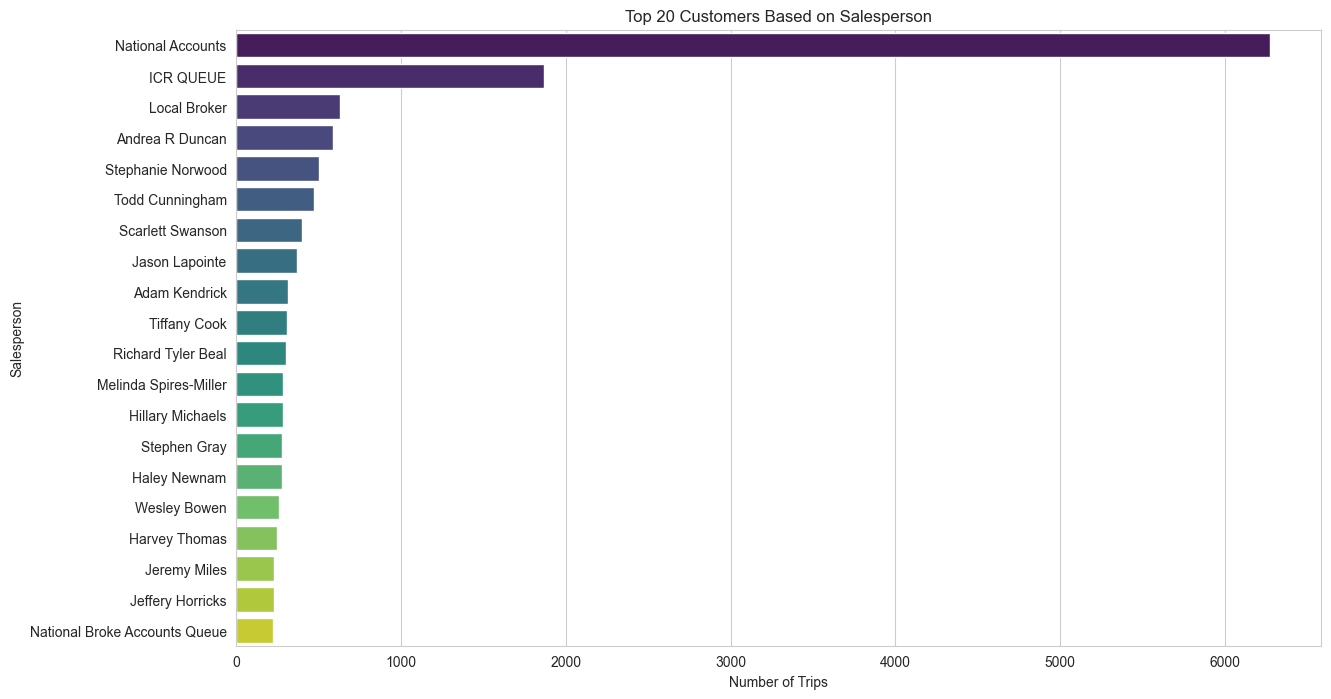

ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

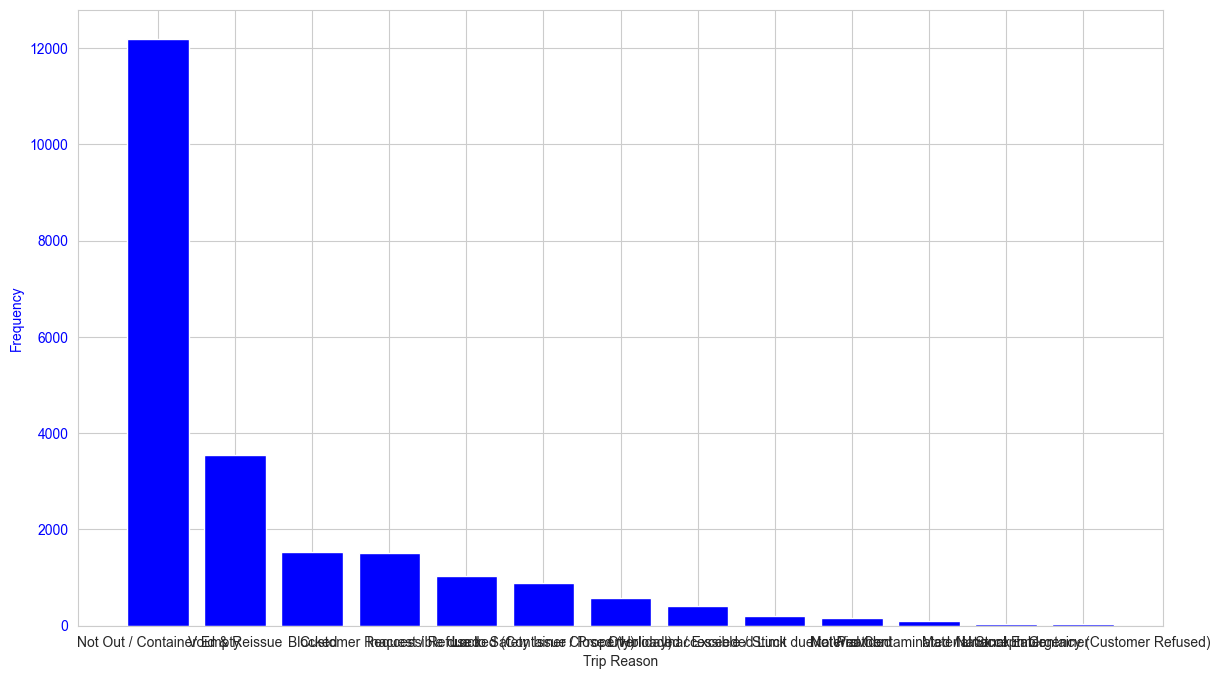

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Drop unnecessary columns
columns_to_drop = ['Ticket Entry Datetime', 'Created By Network ID', 'Customer Uniq Number', 'Load Type', 'On Call / Scheduled', 'SVCGUAR']
data.drop(columns=columns_to_drop, inplace=True)

# Combine 'Cmpny Code' and 'Customer Number' to create a unique customer number with a hyphen
data['Unique Customer Number'] = data['Cmpny Code'].astype(str) + '-' + data['Customer Number'].astype(str)

# Drop the now redundant 'Cmpny Code' and 'Customer Number' columns
data.drop(columns=['Cmpny Code', 'Customer Number'], inplace=True)

# Encode categorical variables
data['High CLV'] = data['High CLV'].map({'Yes': 1, 'No': 0})
data['National Account Flag'] = data['National Account Flag'].map({'Yes': 1, 'No': 0})
data['Trip Charged'] = data['Trip Charged'].map({'Yes': 1, 'No': 0})

# Get dummy variables for categorical features
data_encoded = pd.get_dummies(data, columns=['Service Code', 'Cont. Type', 'Trip Reason', 'DHNAME', 'DHCODE', 'Salesperson'])

# Display the first few rows of the processed dataset
print(data_encoded.head())

# Visualize trip frequency by customer
plt.figure(figsize=(14, 8))
trip_freq_by_customer = data['Customer Name'].value_counts().head(20)  # Top 20 customers by trip frequency
sns.barplot(x=trip_freq_by_customer.values, y=trip_freq_by_customer.index, palette='viridis')
plt.title('Top 20 Customers by Trip Frequency')
plt.xlabel('Number of Trips')
plt.ylabel('Customer')
plt.show()

# Bar Chart for Trip Reasons for High CLV Accounts
plt.figure(figsize=(12, 6))  # Increased figure size for better readability
sns.countplot(x='Trip Reason', data=data[data['High CLV'] == 1])
plt.title('Distribution of Trip Reasons for High CLV Accounts')
plt.xlabel('Trip Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Line Graph for the Number of Trips Over Time for High CLV Accounts
high_clv_trips_over_time = data[data['High CLV'] == 1].groupby('Dispatch Datetime').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=high_clv_trips_over_time.index, y=high_clv_trips_over_time.values)
plt.title('Number of Trips Over Time for High CLV Accounts')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

# Pie Chart for Trip Reasons for High CLV Accounts
high_clv_trip_reason_counts = data[data['High CLV'] == 1]['Trip Reason'].value_counts()
threshold = 0.01 * high_clv_trip_reason_counts.sum()  # Set threshold for grouping less significant categories
significant_reasons = high_clv_trip_reason_counts[high_clv_trip_reason_counts > threshold]
other_reasons = high_clv_trip_reason_counts[high_clv_trip_reason_counts <= threshold]

# Group less significant reasons into 'Other'
significant_reasons['Other'] = other_reasons.sum()

plt.figure(figsize=(10, 10))  # Increased figure size for better readability
plt.pie(significant_reasons, labels=significant_reasons.index, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Distribution of Trip Reasons for High CLV Accounts')
plt.show()

# Top 20 Drivers with Most Trip Charges
plt.figure(figsize=(14, 8))
trip_freq_by_driver = data['DHNAME'].value_counts().head(20)  # Top 20 drivers by trip charges
sns.barplot(x=trip_freq_by_driver.values, y=trip_freq_by_driver.index, palette='viridis')
plt.title('Top 20 Drivers with Most Trip Charges')
plt.xlabel('Number of Trips')
plt.ylabel('Driver')
plt.show()

# Top 20 Customers Based on Salesperson
plt.figure(figsize=(14, 8))
trip_freq_by_salesperson = data['Salesperson'].value_counts().head(20)  # Top 20 customers based on salesperson
sns.barplot(x=trip_freq_by_salesperson.values, y=trip_freq_by_salesperson.index, palette='viridis')
plt.title('Top 20 Customers Based on Salesperson')
plt.xlabel('Number of Trips')
plt.ylabel('Salesperson')
plt.show()

# Pareto Chart for Trip Reasons
trip_reason_counts = data['Trip Reason'].value_counts()
trip_reason_cumsum = trip_reason_counts.cumsum() / trip_reason_counts.sum()

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(trip_reason_counts.index, trip_reason_counts.values, color='b')
ax1.set_xlabel('Trip Reason')
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params('y', colors='b')
ax1.tick_params('x', rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(trip_reason_counts.index, trip_reason_cumsum, color='r', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Chart for Trip Reasons')
plt.tight_layout()
plt.show()

# Histogram for Trip Duration (assuming 'Trip Duration' is a column)
plt.figure(figsize=(14, 8))
sns.histplot(data['Trip Duration'], kde=True, bins=30, color='purple')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()

# Histogram for Trip Charges
plt.figure(figsize=(14, 8))
sns.histplot(data['Trip Charged'], kde=True, bins=30, color='green')
plt.title('Distribution of Trip Charges')
plt.xlabel('Trip Charged')
plt.ylabel('Frequency')
plt.show()


                   Area Ticket Entry Datetime Dispatch Datetime  \
0  WM of South Atlantic              8/9/2023          2/8/2024   
1  WM of South Atlantic             10/4/2023         3/29/2024   
2  WM of South Atlantic             10/6/2023          1/4/2024   
3  WM of South Atlantic             10/9/2023          4/1/2024   
4  WM of South Atlantic            10/10/2023          1/8/2024   

  Created By Network ID  Customer Uniq Number  Ticket Cmpny Code  \
0              AABERCRO          291815583007  797927        356   
1               ESBCASE          294400403003  924048        096   
2                RBUDDE          104501522003  927754        730   
3                JREEVE          250601553006  930400        118   
4              CWALKE29          167000173003  939486        731   

   Customer Number High CLV                   Customer Name  ... DHCODE  \
0            41097       No  SOUTH PIEDMONT COMMUNITY COLLE  ...  LGCON   
1           116614       No           

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1405778188.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_customer.values, y=trip_freq_by_customer.index, palette='viridis')


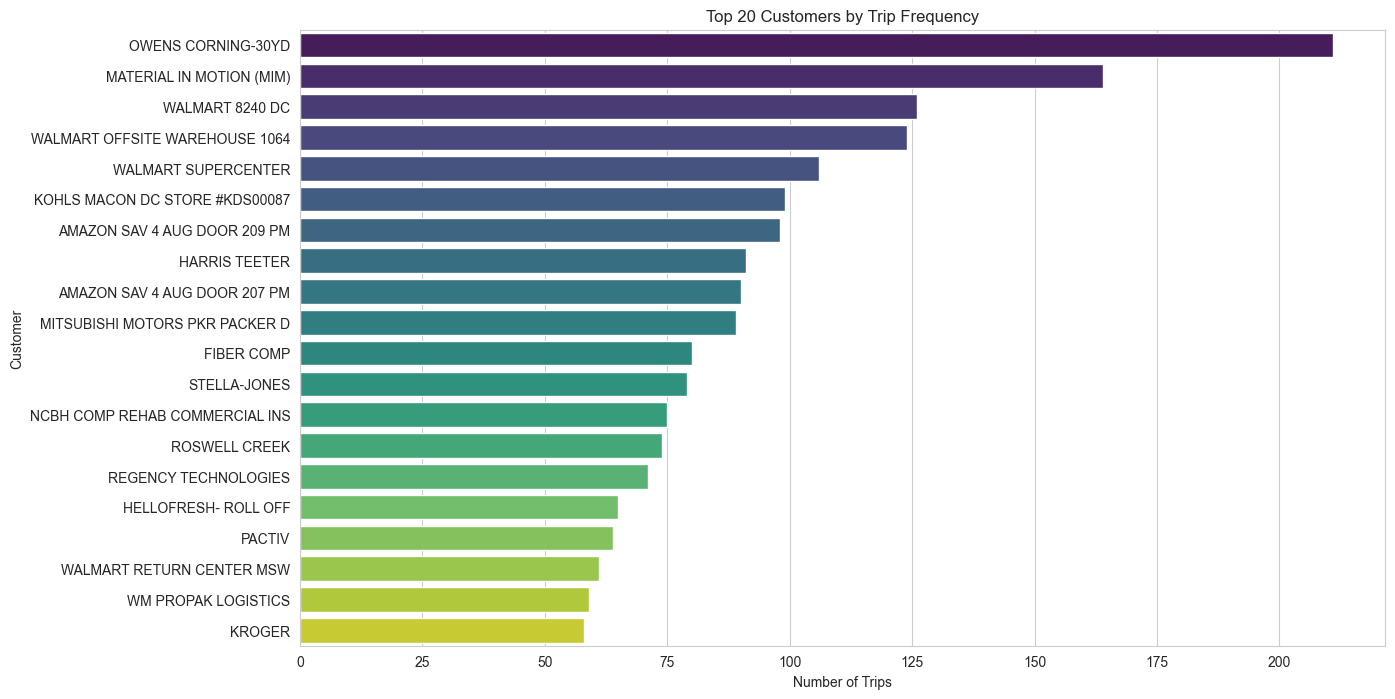

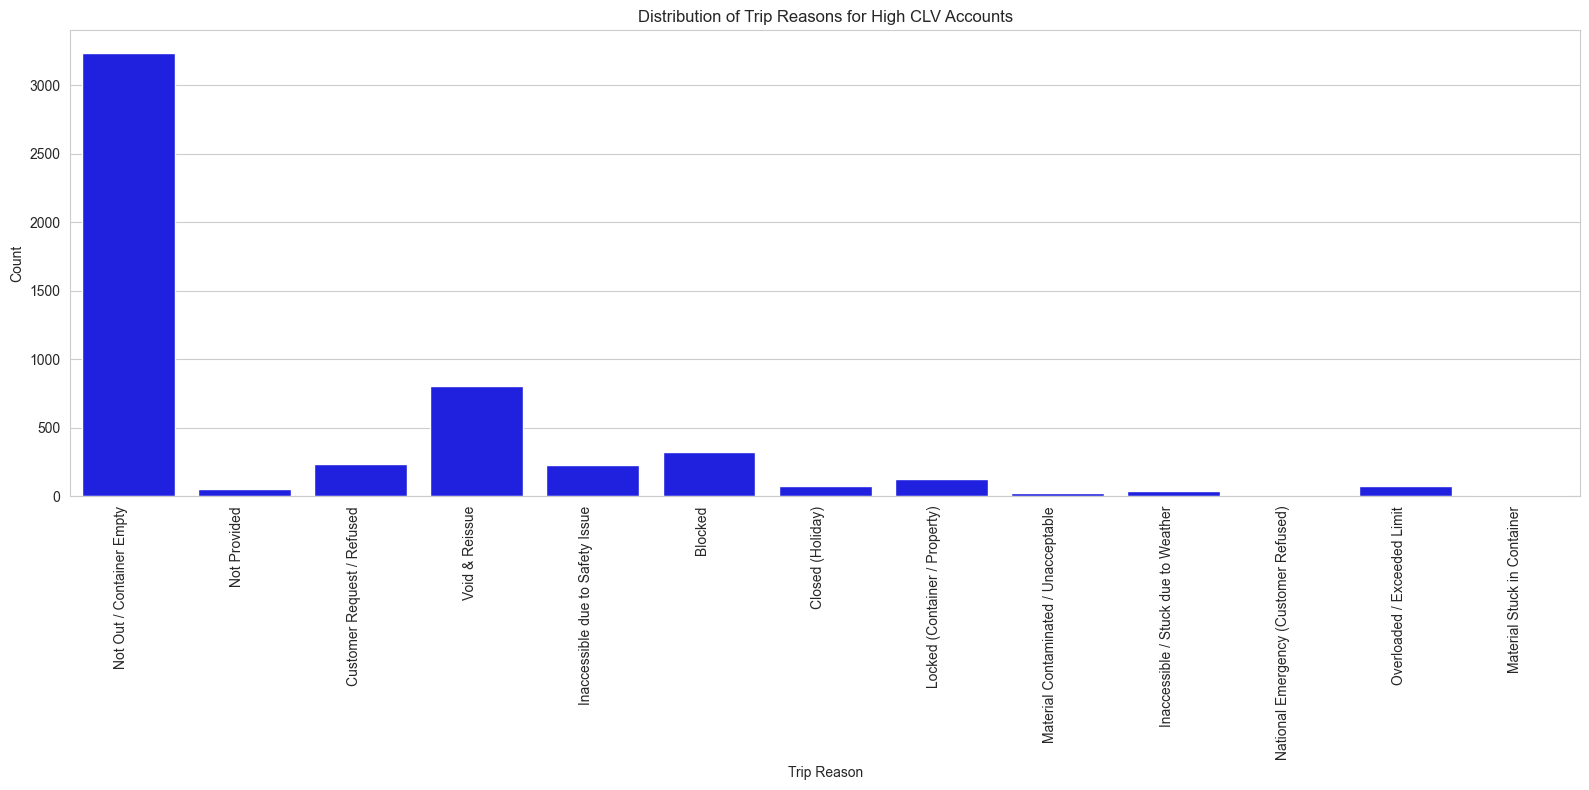

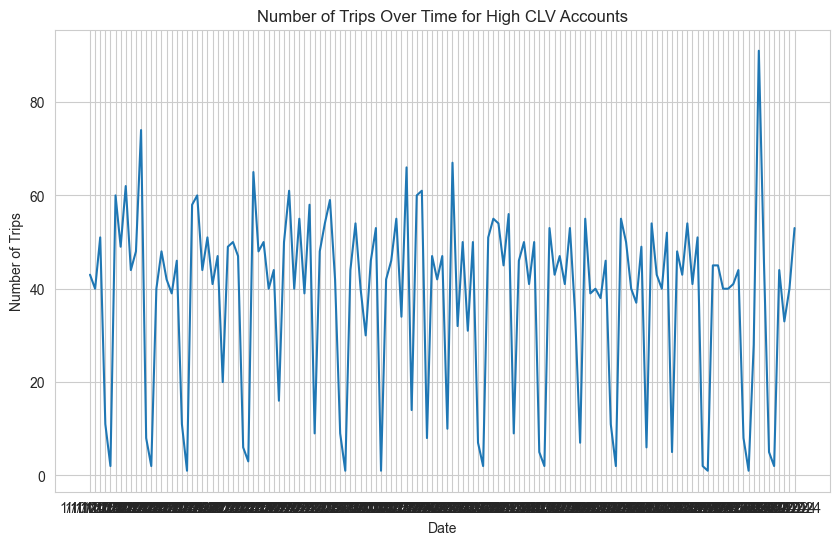

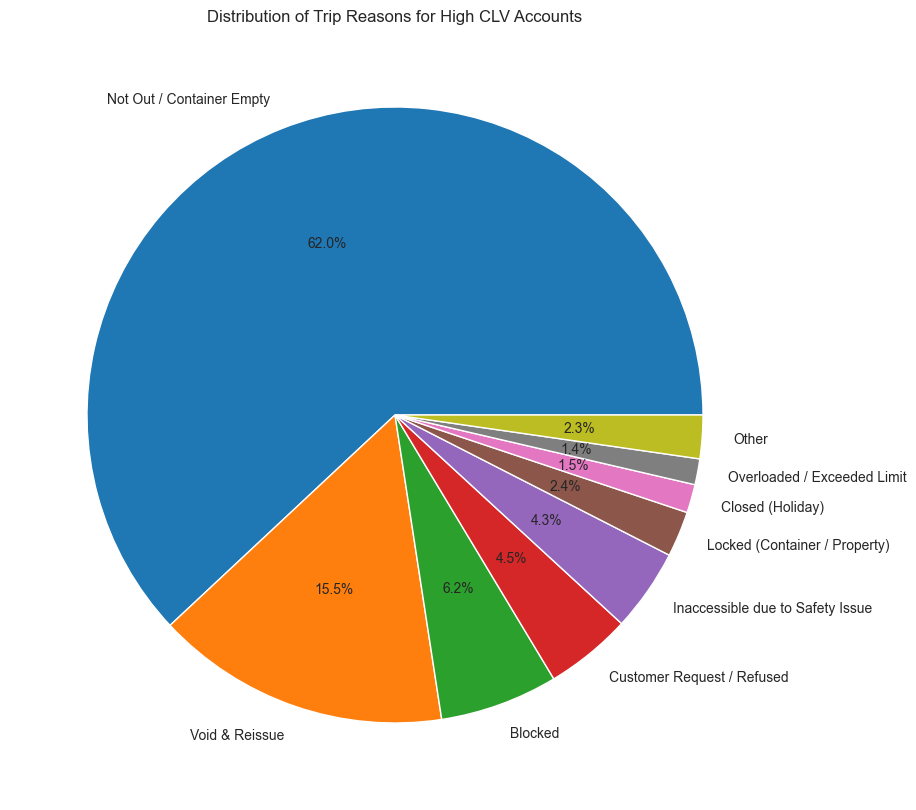

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1405778188.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_driver.values, y=trip_freq_by_driver.index, palette='viridis')


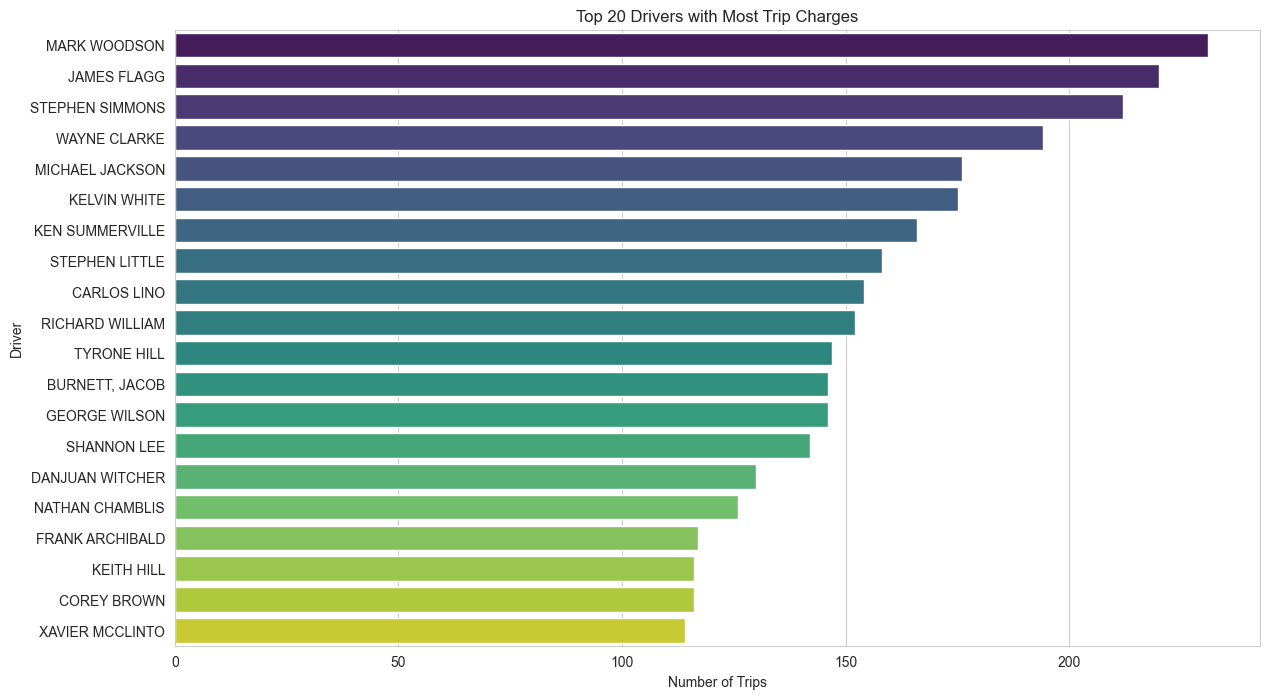

C:\Users\grays\AppData\Local\Temp\ipykernel_40312\1405778188.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_freq_by_salesperson.values, y=trip_freq_by_salesperson.index, palette='viridis')


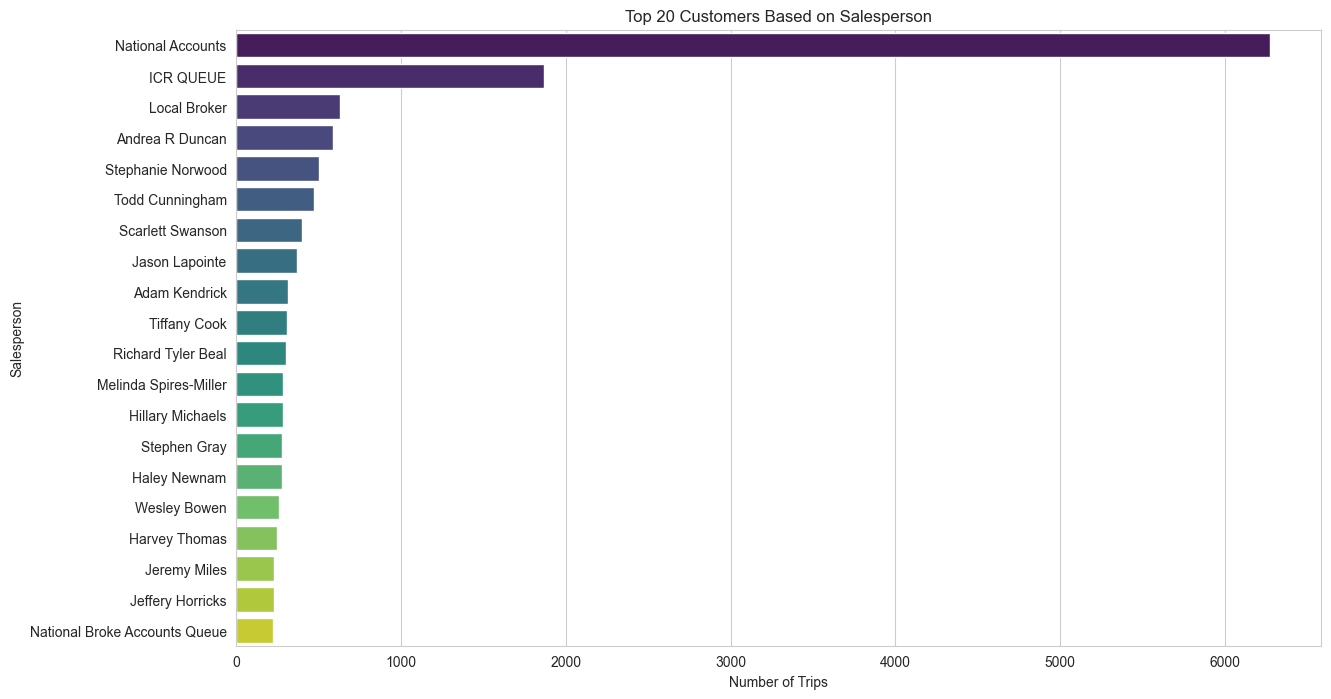

ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

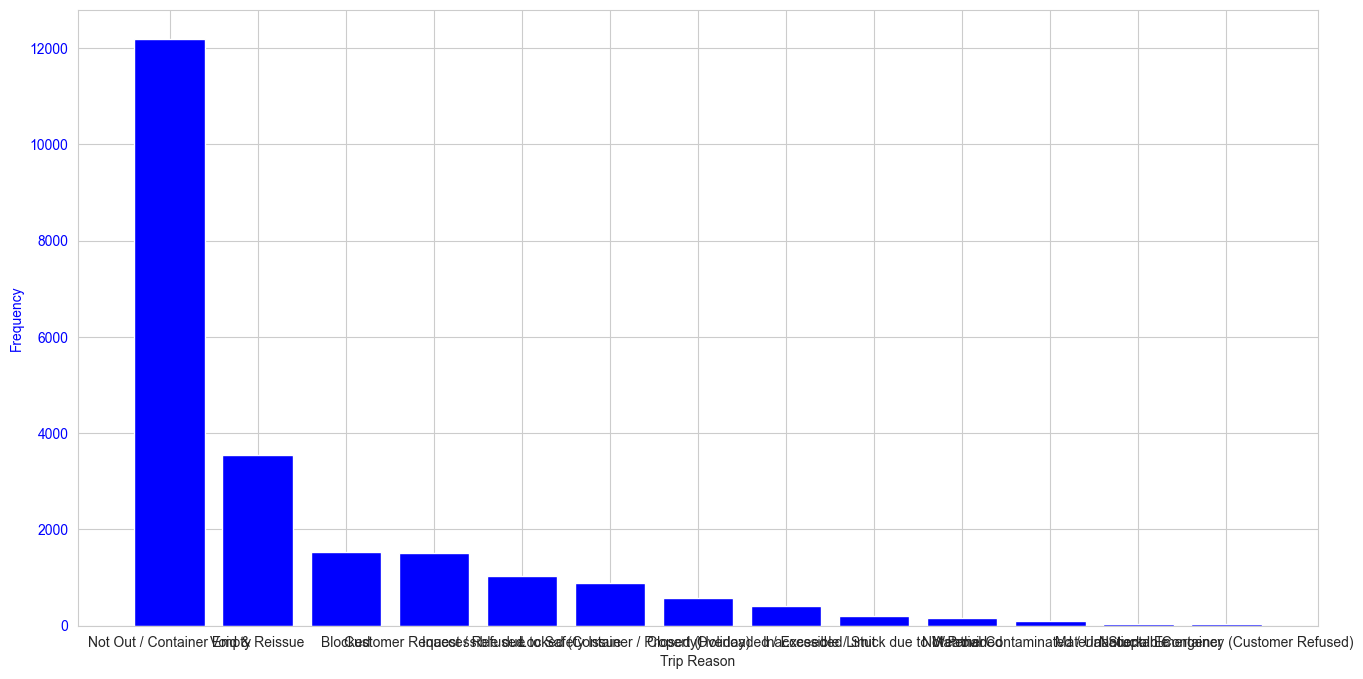

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Drop unnecessary columns
columns_to_drop = ['Ticket Entry Datetime', 'Created By Network ID', 'Customer Uniq Number', 'Load Type', 'On Call / Scheduled', 'SVCGUAR']
data.drop(columns=columns_to_drop, inplace=True)

# Combine 'Cmpny Code' and 'Customer Number' to create a unique customer number with a hyphen
data['Unique Customer Number'] = data['Cmpny Code'].astype(str) + '-' + data['Customer Number'].astype(str)

# Drop the now redundant 'Cmpny Code' and 'Customer Number' columns
data.drop(columns=['Cmpny Code', 'Customer Number'], inplace=True)

# Encode categorical variables
data['High CLV'] = data['High CLV'].map({'Yes': 1, 'No': 0})
data['National Account Flag'] = data['National Account Flag'].map({'Yes': 1, 'No': 0})
data['Trip Charged'] = data['Trip Charged'].map({'Yes': 1, 'No': 0})

# Get dummy variables for categorical features
data_encoded = pd.get_dummies(data, columns=['Service Code', 'Cont. Type', 'Trip Reason', 'DHNAME', 'DHCODE', 'Salesperson'])

# Display the first few rows of the processed dataset
print(data_encoded.head())

# Visualize trip frequency by customer
plt.figure(figsize=(14, 8))
trip_freq_by_customer = data['Customer Name'].value_counts().head(20)  # Top 20 customers by trip frequency
sns.barplot(x=trip_freq_by_customer.values, y=trip_freq_by_customer.index, palette='viridis')
plt.title('Top 20 Customers by Trip Frequency')
plt.xlabel('Number of Trips')
plt.ylabel('Customer')
plt.show()

# Bar Chart for Trip Reasons for High CLV Accounts
plt.figure(figsize=(16, 8))  # Increased figure size for better readability
sns.countplot(x='Trip Reason', data=data[data['High CLV'] == 1], color='blue')
plt.title('Distribution of Trip Reasons for High CLV Accounts')
plt.xlabel('Trip Reason')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Line Graph for the Number of Trips Over Time for High CLV Accounts
high_clv_trips_over_time = data[data['High CLV'] == 1].groupby('Dispatch Datetime').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=high_clv_trips_over_time.index, y=high_clv_trips_over_time.values)
plt.title('Number of Trips Over Time for High CLV Accounts')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

# Pie Chart for Trip Reasons for High CLV Accounts
high_clv_trip_reason_counts = data[data['High CLV'] == 1]['Trip Reason'].value_counts()
threshold = 0.01 * high_clv_trip_reason_counts.sum()  # Set threshold for grouping less significant categories
significant_reasons = high_clv_trip_reason_counts[high_clv_trip_reason_counts > threshold]
other_reasons = high_clv_trip_reason_counts[high_clv_trip_reason_counts <= threshold]

# Group less significant reasons into 'Other'
significant_reasons['Other'] = other_reasons.sum()

plt.figure(figsize=(10, 10))  # Increased figure size for better readability
plt.pie(significant_reasons, labels=significant_reasons.index, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Distribution of Trip Reasons for High CLV Accounts')
plt.show()

# Top 20 Drivers with Most Trip Charges
plt.figure(figsize=(14, 8))
trip_freq_by_driver = data['DHNAME'].value_counts().head(20)  # Top 20 drivers by trip charges
sns.barplot(x=trip_freq_by_driver.values, y=trip_freq_by_driver.index, palette='viridis')
plt.title('Top 20 Drivers with Most Trip Charges')
plt.xlabel('Number of Trips')
plt.ylabel('Driver')
plt.show()

# Top 20 Customers Based on Salesperson
plt.figure(figsize=(14, 8))
trip_freq_by_salesperson = data['Salesperson'].value_counts().head(20)  # Top 20 customers based on salesperson
sns.barplot(x=trip_freq_by_salesperson.values, y=trip_freq_by_salesperson.index, palette='viridis')
plt.title('Top 20 Customers Based on Salesperson')
plt.xlabel('Number of Trips')
plt.ylabel('Salesperson')
plt.show()

# Pareto Chart for Trip Reasons
trip_reason_counts = data['Trip Reason'].value_counts()
trip_reason_cumsum = trip_reason_counts.cumsum() / trip_reason_counts.sum()

fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.bar(trip_reason_counts.index, trip_reason_counts.values, color='b')
ax1.set_xlabel('Trip Reason')
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params('y', colors='b')
ax1.tick_params('x', rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.plot(trip_reason_counts.index, trip_reason_cumsum, color='r', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Chart for Trip Reasons')
plt.tight_layout()
plt.show()

# Histogram for Trip Duration (assuming 'Trip Duration' is a column)
plt.figure(figsize=(14, 8))
sns.histplot(data['Trip Duration'], kde=True, bins=30, color='purple')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()

# Histogram for Trip Charges
plt.figure(figsize=(14, 8))
sns.histplot(data['Trip Charged'], kde=True, bins=30, color='green')
plt.title('Distribution of Trip Charges')
plt.xlabel('Trip Charged')
plt.ylabel('Frequency')
plt.show()


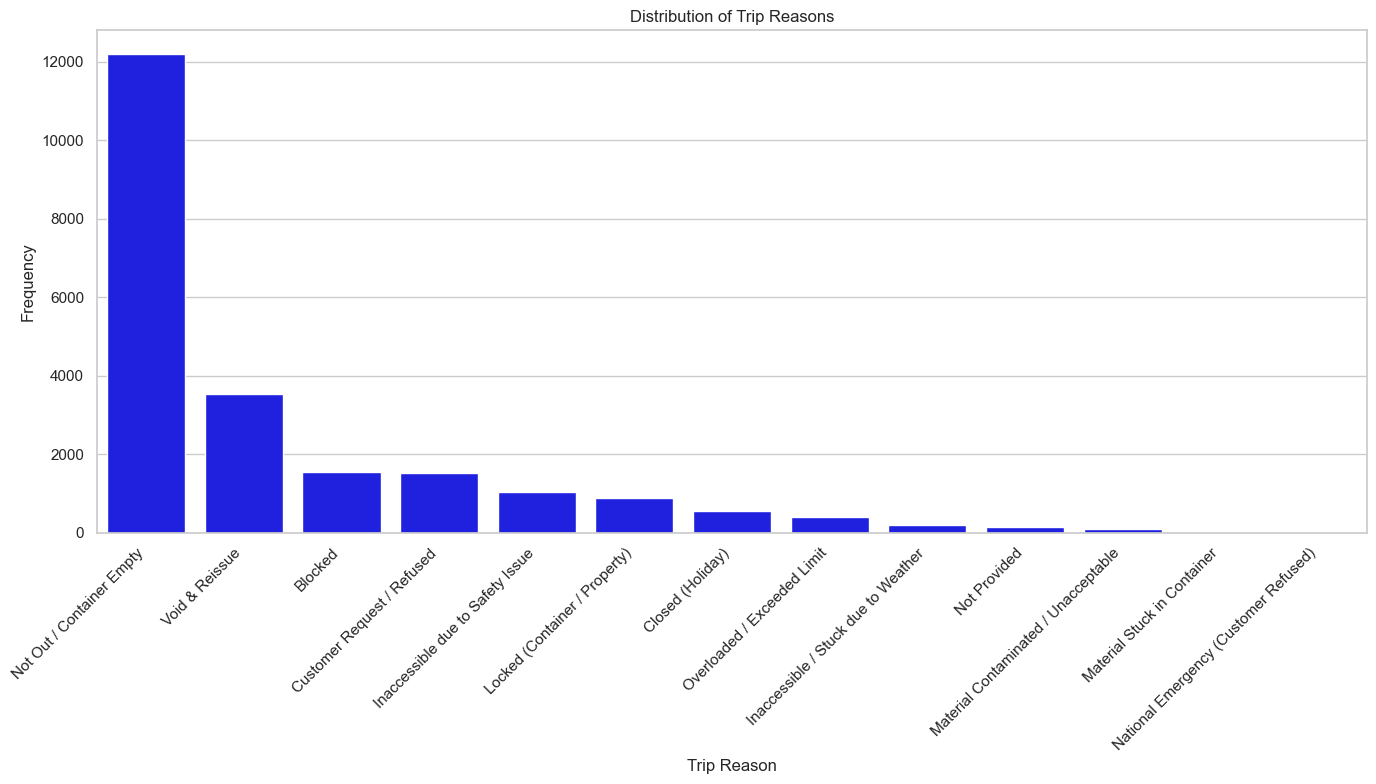

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
data = pd.read_csv(file_path)

# Combine 'Cmpny Code' and 'Customer Number' to create a unique customer identifier
data['Unique Customer Number'] = data['Cmpny Code'].astype(str) + '-' + data['Customer Number'].astype(str)

# Drop unnecessary columns
data = data.drop(['Ticket Entry Datetime', 'Created By Network ID', 'Customer Uniq Number', 'Load Type', 'On Call / Scheduled', 'SVCGUAR'], axis=1)

# Set plot style
sns.set(style="whitegrid")

# Visualize distribution of trip reasons
plt.figure(figsize=(14, 8))
trip_reason_counts = data['Trip Reason'].value_counts()
sns.barplot(x=trip_reason_counts.index, y=trip_reason_counts.values, color='blue')
plt.title('Distribution of Trip Reasons')
plt.xlabel('Trip Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


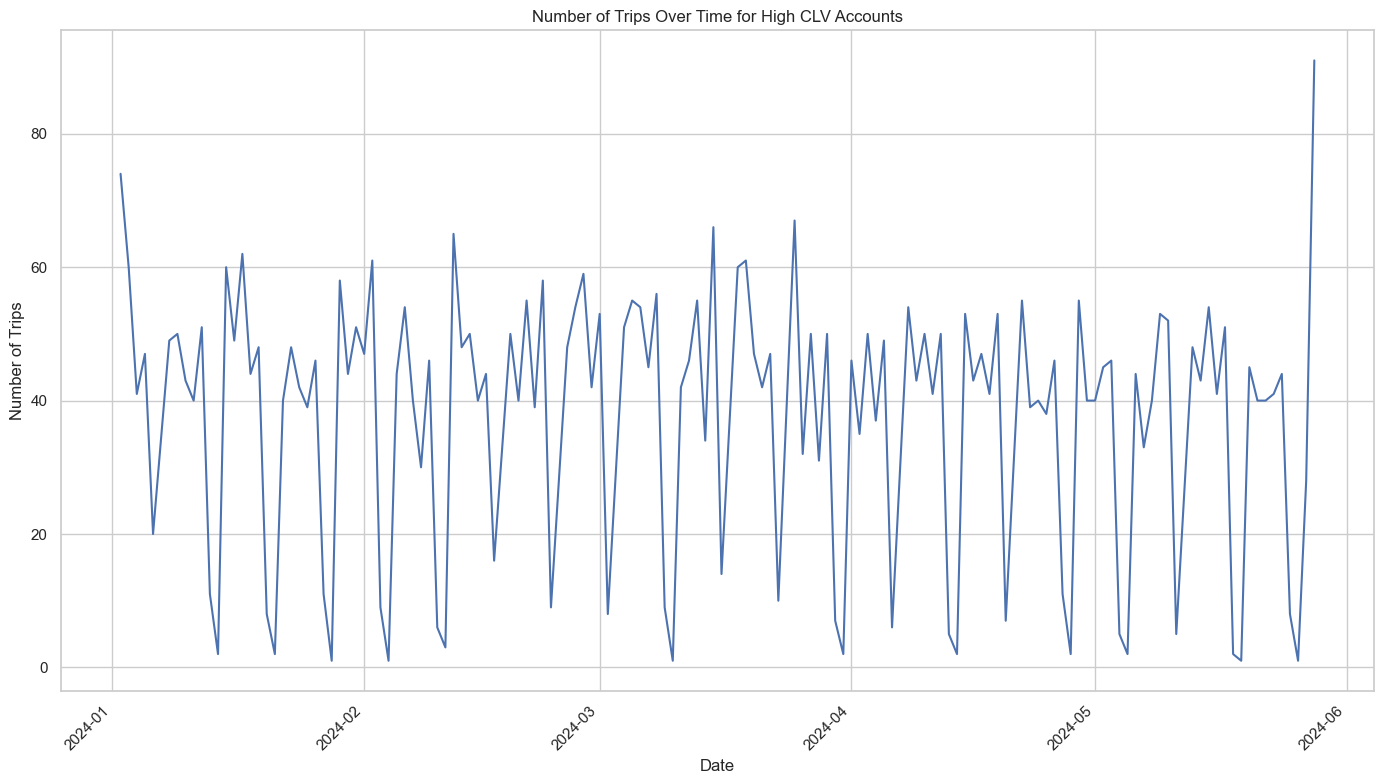

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\grays\\OneDrive\\Trip Data CSV.csv"
data = pd.read_csv(file_path)

# Combine 'Cmpny Code' and 'Customer Number' to create a unique customer identifier
data['Unique Customer Number'] = data['Cmpny Code'].astype(str) + '-' + data['Customer Number'].astype(str)

# Drop unnecessary columns
data = data.drop(['Ticket Entry Datetime', 'Created By Network ID', 'Customer Uniq Number', 'Load Type', 'On Call / Scheduled', 'SVCGUAR'], axis=1)

# Convert 'Dispatch Datetime' to datetime format and extract date
data['Dispatch Datetime'] = pd.to_datetime(data['Dispatch Datetime'])
data['Date'] = data['Dispatch Datetime'].dt.date

# Set plot style
sns.set(style="whitegrid")

# Filter data for high CLV accounts
high_clv_data = data[data['High CLV'] == 'Yes']

# Plot number of trips over time for high CLV accounts
plt.figure(figsize=(14, 8))
high_clv_trips_over_time = high_clv_data.groupby('Date').size()
sns.lineplot(x=high_clv_trips_over_time.index, y=high_clv_trips_over_time.values)
plt.title('Number of Trips Over Time for High CLV Accounts')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
